<a href="https://colab.research.google.com/github/thasniyamansoora/Myy_projects/blob/main/Thasniya_Mansoora_Zomato_Restaurant_Clustering_%26_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Zomato_Restaurant_Clustering_&_Sentiment_Analysis**



##### **Project Type**    - Unsupervised

##### **Team Member 1 -** Thasniya Mansoora




# **Project Summary -**

This project used advanced data analytics techniques to gain a deeper understanding of restaurants and customer feedback on the popular online meal delivery platform, Zomato.

Data obtained included information such as the restaurant name, location, dishes, average cost for two people, ratings, and user reviews.

We then began data cleaning and pre-processing, eliminating duplicate entries, correcting missing values, and converting the data into a format suitable for analysis.

The next step in the project was to perform clustering of the restaurant data using the k-means algorithm. The goal of clustering was to group similar restaurants together and identify patterns in the data. The characteristics used for clustering included restaurant location, cuisines, and average cost for two people. The number of clusters was determined using the elbow method.

I then conducted a sentiment analysis of the user ratings to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were used to classify the reviews as positive, negative, or neutral. I also extracted the most frequently occurring words in the reviews and visualized them by creating word clouds.

The result of the analysis showed that the restaurants in the city were classified into five groups based on location, cuisine, and average price for two people. The sentiment analysis showed that customers generally had a positive attitude towards the restaurants.

In summary, this project is an example of the usefulness of clustering and sentiment analysis to gain a deeper understanding of restaurant data on Zomato. The insights gained from the analysis can be of great use to both restaurants and customers to make informed decisions. In addition, the project can be extended to other cities or even countries to gain insights into the eating habits and preferences of people in different regions.

This endeavor harnessed the prowess of cutting-edge data analytics techniques, delving into the intricate world of restaurants and the invaluable feedback flowing through the veins of the renowned online meal delivery titan, Zomato.

Our treasure trove of data encompassed an array of vital elements: restaurant appellations, geographical coordinates, gastronomic offerings, the average tabulation for a pair of patrons, star-studded ratings, and the veritable tapestry of user musings in the form of reviews.

With meticulous care, we embarked on a journey of data refinement and meticulous preening. Duplicate entries were expunged, errant voids rectified, and the raw data underwent a transformative metamorphosis, emerging polished and primed for in-depth scrutiny.

Into the heart of the project, we plunged, employing the formidable k-means algorithm to orchestrate a symphony of data clustering. Our objective: to forge bonds between kindred culinary establishments and unearth hidden symmetries within our dataset. The characteristics wielded in this meticulous ballet included the geographical essence of each restaurant, the kaleidoscope of cuisines on offer, and the price point that beckoned pairs of gastronomic adventurers. The alchemy of cluster count determination, guided by the discerning elbow method, revealed the optimal structure for our data.

Venturing further into the realm of sentiment, we conducted a profound analysis of user ratings, peering into the very soul of the collective sentiment towards these dining sanctuaries. Armed with libraries of sentiment classifiers, we dissected reviews with surgical precision, distinguishing positivity from negativity and the nuanced neutrality that lingers in between. Moreover, we plucked the words that resonated most profoundly in the chorus of user expression, adorning our findings with visually captivating word clouds.

The fruits of our labor bore witness to the emergence of a culinary constellation, an intricate tapestry of five distinct restaurant archetypes, woven together by threads of location, culinary identity, and the monetary tapestry woven for a duo of diners. In the realm of sentiment, our analysis uncovered a harmonious symphony of positivity, a testament to the culinary excellence bestowed by these establishments.

In summation, this project stands as a testament to the transformative power of clustering and sentiment analysis in unraveling the enigma of Zomato's culinary landscape. The wisdom distilled from this endeavor holds the promise of enlightenment, benefiting both purveyors of gastronomy and discerning diners alike. Moreover, the horizons of this exploration stretch wide, offering the potential to traverse cities, nations, and even continents, revealing the nuanced palates and predilections of diverse regions, one bite at a time.

# **GitHub Link -**

https://github.com/thasniyamansoora/zZomato_Restaurant_Clustering_-_Sentiment_Analysis

# **Problem Statement**




I used fancy data techniques to learn more about restaurants and what customers think on Zomato, a popular food delivery website.

I collected data like restaurant names, locations, menu prices, ratings, and reviews. We cleaned up the data by removing duplicates and fixing missing info to make it ready for analysis.

Then, I grouped restaurants based on things like where they are, what food they serve, and how much it costs for two people. This helped me see patterns in the data. I decided how many groups to make using a method called the elbow method.

I also checked if customers liked the restaurants by analyzing their reviews. I used tools to figure out if the reviews were positive, negative, or neutral. I also found the most common words in the reviews and made word clouds.

My analysis showed that the restaurants in the city fell into five groups based on location, food, and prices. People mostly had good things to say about them.

In summary, this project shows how we can use data to understand Zomato's restaurant info better. It can help restaurants and customers make better choices. And, we can use this approach in different places to learn more about what people like to eat."

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

Hotel_df = pd.read_csv('/content/drive/MyDrive/Almabetter/capstone project/unsupervisedML-Clusterring/Zomato Restaurant names and Metadata.csv')
Review_df = pd.read_csv('/content/drive/MyDrive/Almabetter/capstone project/unsupervisedML-Clusterring/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look - Restaurant
Hotel_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
# Dataset First Look - Reviews
Review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f' The shape of Restaurents data is',Hotel_df.shape)
print(f' The shape of Reviews data is',Review_df.shape)

 The shape of Restaurents data is (105, 6)
 The shape of Reviews data is (10000, 7)


### Dataset Information

In [ ]:
# Dataset Info - Restaurant
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Dataset Info - Reviews
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f'No. of duplicates in Restaurants data is {Hotel_df.duplicated().sum()}')
print(f'No. of duplicates in Reviews data is {Review_df.duplicated().sum()}')

No. of duplicates in Restaurants data is 0
No. of duplicates in Reviews data is 36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print('Missing Values in Restaurants Data:-')
print(Hotel_df.isnull().sum(),'\n')

print('Missing Values in Reviews Data:-')
print(Review_df.isnull().sum())

Missing Values in Restaurants Data:-
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing Values in Reviews Data:-
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


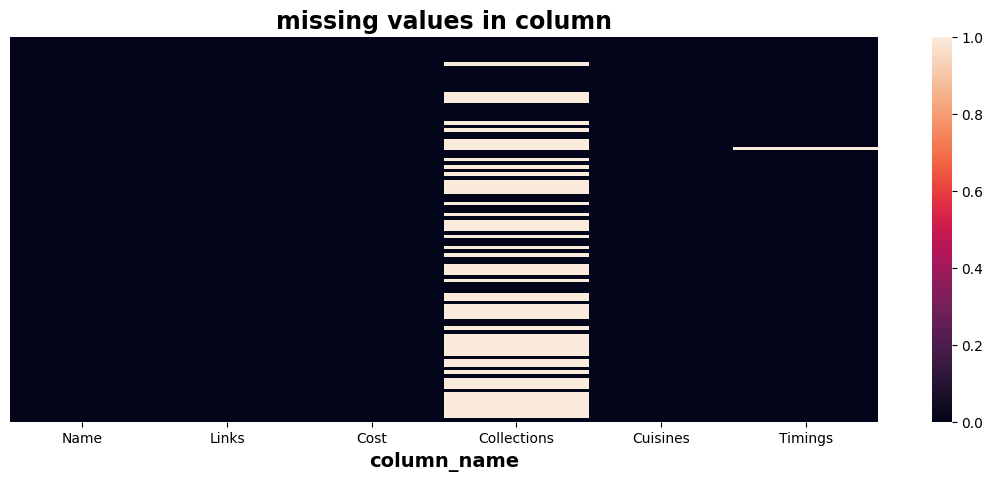

In [ ]:
# Visualizing the missing values - Restaurant

plt.figure(figsize=(14,5))
sns.heatmap(Hotel_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

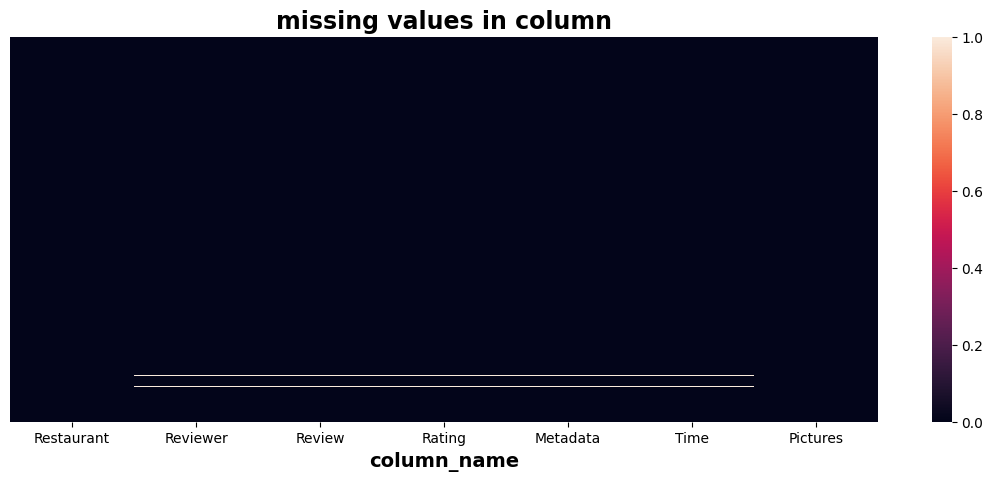

In [ ]:
# Visualizing the missing values - Reviews

plt.figure(figsize=(14,5))
sns.heatmap(Review_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

Restaurent Data

1.In this dataset, we have a limited number of rows and features.

2.The 'Cost' column should be in integer format, but it is currently stored as an object and requires some adjustments.

3.The 'Time' attribute, which should specify the restaurant's working hours, is currently unstructured and needs organization.

4.Fortunately, there are no duplicate values in this dataset.

5.However, the 'Time' column has a missing value, and the 'Collection' attribute has 51% null values.

Now, let's look at the Reviews Data:

1.This dataset contains 10,000 rows and 7 features.

2.Except for 'Restaurant' and 'Pictures,' each feature contains some zero values.

3.The 'Rating' column should ideally be of integer data type, but it is currently stored as an object.

4.There are 36 duplicated values in this dataset, with most of them having zero values.

5.The 'Timing' feature is supposed to be in datetime format, but it is currently stored as an object.

In summary, the dataset needs some data type adjustments, missing value handling, and cleaning to make it more structured and usable for analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f'Restaurant data columns:- {list(Hotel_df.columns)}\n')
print(f'Review data columns:- {list(Review_df.columns)}')

Restaurant data columns:- ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Review data columns:- ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe - Restaurant
Hotel_df.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [ ]:
# Dataset Describe - Reviews
Review_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

#**Restaurant data**

**Name** : Restaurant name

**Links** : Web links of restaurants

**Cost** : Per person estimated cost for a meal

**Collection** : Keywording of restaurants by Zomato categories

**Cuisines** : Cuisines offered by the restaurants

**Hours** : Opening hours of the restaurants



##**Reviews data**
**Restaurant** : Name of the restaurant

**Reviewer** : Name of the reviewer

**Review** **bold text** : Text of the rating

**Rating** : Rating given by the reviewer

**MetaData** : Reviewer metadata - number of ratings and followers

**Time** : Date and time of the rating

**Pictures** : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

print('No. of Unique values in Restaurant Data')
print(Hotel_df.nunique(), '\n')

print('No. of Unique values in Reviews Data')
print(Review_df.nunique())

No. of Unique values in Restaurant Data
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 

No. of Unique values in Reviews Data
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [ ]:
#creating copy of both the data
hotel = Hotel_df.copy()
review =Review_df.copy()

## 3. ***Data Wrangling***

### Data Wrangling Code

####   For Restaurant Data

In [ ]:
# check the unique values of cost
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [ ]:
# converting cost column into int64
hotel = hotel.astype({'Cost':'int'})

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [ ]:
# Get the function for number of cuisine in a hotel
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in hotel dataframe
hotel['No_of_cuisine']=hotel['Cuisines'].apply(get_no_of_cuisine)

####   For Review Data

In [ ]:
#splitting the metadata into Reviews and Followers
review['No_of_reviews'],review['Followers'] = review['Metadata'].str.split(',').str
review['No_of_reviews'] = pd.to_numeric(review['No_of_reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  No_of_reviews  \
0           1 Review , 2 Followers  5/25/2019 15:54         0            1.0   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0            3.0   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0            2.0   
3            1 Review , 1 Follower  5/24/2019 22:11         0            1.0   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0            3.0   
...                            ...              ...       ...            ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0           53.0   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0            2.0   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3           65.0   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0           13.0   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6          472.0   

      Followers  
0           2.0  
1           2.0  
2           3.0  
3           1.0  
4           2.0  
...         ...  
9995       54.0  
9996       53.0  
9997      423.0  
9998      144.0  
9999     1302.0  

[10000 rows x 9 columns]

In [ ]:
# Filling the null values of Followes with 0
review['Followers'].fillna(0,inplace=True)

In [ ]:
# convert the 'Time' column from object to datetime data type
review['Time'] = pd.to_datetime(review['Time'], format='%m/%d/%Y %H:%M')
review['Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype         
--------------  -----         
9962 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [ ]:
# Converting Time to date time and extracting Hour and year
review['Time']=pd.to_datetime(review['Time'])
review['Year']=pd.DatetimeIndex(review['Time']).year
review['Month']=pd.DatetimeIndex(review['Time']).month
review['Hour'] = pd.DatetimeIndex(review['Time']).hour

In [ ]:
review.describe()

Pictures  No_of_reviews     Followers         Year        Month  \
count  10000.000000    9962.000000  10000.000000  9962.000000  9962.000000   
mean       0.748600      23.990865    162.374800  2018.452118     6.017868   
std        2.570381      50.615027    618.852357     0.562494     3.159464   
min        0.000000       0.000000      0.000000  2016.000000     1.000000   
25%        0.000000       1.000000      1.000000  2018.000000     4.000000   
50%        0.000000       4.000000      6.000000  2018.000000     5.000000   
75%        0.000000      22.000000     63.000000  2019.000000     8.000000   
max       64.000000    1031.000000  13410.000000  2019.000000    12.000000   

              Hour  
count  9962.000000  
mean     15.187412  
std       6.579646  
min       0.000000  
25%      12.000000  
50%      16.000000  
75%      21.000000  
max      23.000000

In [ ]:
# Total count of ratings from 1 star to 5 star
ratings = review['Rating'].value_counts().reset_index()
ratings.rename(columns={'index': 'Ratings(1-5)'}, inplace=True)
ratings.rename(columns={'Rating': 'Count'}, inplace=True)
ratings

Ratings(1-5)  Count
0            5   3832
1            4   2373
2            1   1735
3            3   1193
4            2    684
5          4.5     69
6          3.5     47
7          2.5     19
8          1.5      9
9         Like      1

In [ ]:
# drop the rows where 'Rating' is not equal to 'Like'
review = review[review['Rating'] != 'Like']

In [ ]:
# Converting Rating dtype into float
review['Rating'] = review['Rating'].astype('float')

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9999 non-null   object        
 1   Reviewer       9961 non-null   object        
 2   Review         9954 non-null   object        
 3   Rating         9961 non-null   float64       
 4   Metadata       9961 non-null   object        
 5   Time           9961 non-null   datetime64[ns]
 6   Pictures       9999 non-null   int64         
 7   No_of_reviews  9961 non-null   float64       
 8   Followers      9999 non-null   float64       
 9   Year           9961 non-null   float64       
 10  Month          9961 non-null   float64       
 11  Hour           9961 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1015.5+ KB


In [ ]:
# extract Review_count and Followers from Metadata
review['Review_count'] = review['Metadata'].str.extract('(\d+) Review')
review['Followers'] = review['Metadata'].str.extract('(\d+) Follower')

In [ ]:
# fill missing values with 0 in 'Review_count' column and 'Followers' column
review['Review_count'] = pd.to_numeric(review['Review_count']).fillna(0).astype(int)
review['Followers'] = pd.to_numeric(review['Followers']).fillna(0).astype(int)

In [ ]:
# Dropping unnecessary column as it is not needed now
review = review.drop(columns=['Metadata'])
review.isnull().sum()

Restaurant        0
Reviewer         38
Review           45
Rating           38
Time             38
Pictures          0
No_of_reviews    38
Followers         0
Year             38
Month            38
Hour             38
Review_count      0
dtype: int64

In [ ]:
#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [ ]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0       American      2
1         Andhra      3
2        Arabian      1
3          Asian     10
4            BBQ      1
..           ...    ...
64  North Indian     61
65       Seafood      1
66  South Indian      2
67   Street Food      2
68          Thai      1

[69 rows x 2 columns]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Find out the costliest restaurants
costly_res=hotel[['Name','Cost']].groupby('Name',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

Name    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6             Republic Of Noodles - Lemon Tree Hotel  1700.0
7              Mazzo - Marriott Executive Apartments  1700.0
8                                    Barbeque Nation  1600.0
9                                       Arena Eleven  1600.0

In [ ]:
#Find out the cheapest restaurants
cheapest_res = hotel[['Name','Cost']].groupby('Name',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

Name   Cost
0       Mohammedia Shawarma  150.0
1                      Amul  150.0
2              Sweet Basket  200.0
3                 KS Bakers  200.0
4             Momos Delight  200.0
5        Hunger Maggi Point  200.0
6            Asian Meal Box  200.0
7               Wich Please  250.0
8  Shah Ghouse Spl Shawarma  300.0
9                  Tempteys  350.0

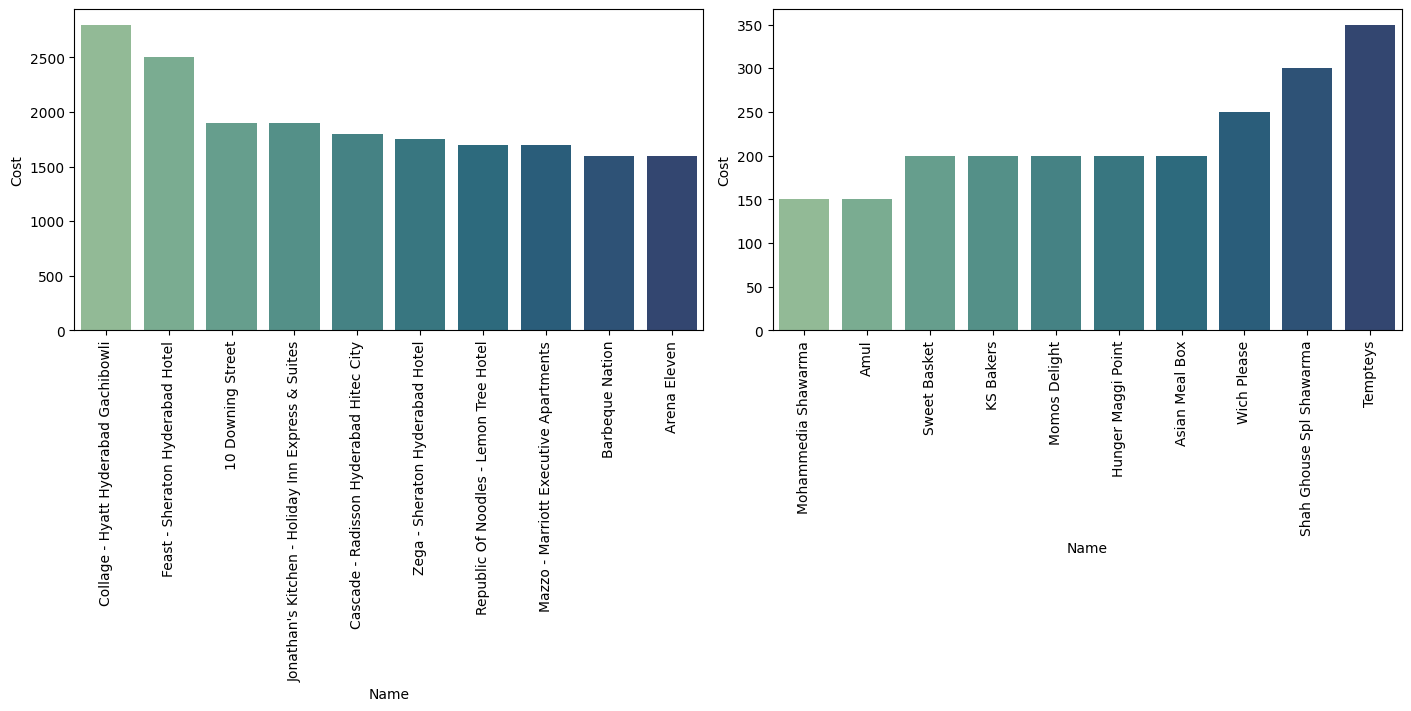

In [ ]:
#visualisation of most expensive and cheapest restaurant
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

#costliest restaurant
a=sns.barplot(x = 'Name',y = 'Cost',data = costly_res,ax = axes[0],palette = 'crest')
a.set_xticklabels(labels=costly_res['Name'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Name',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'crest')
b.set_xticklabels(labels=cheapest_res['Name'].to_list(),rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is a type of chart used for displaying data related to a single characteristic, making it particularly effective for comparing various observations within that characteristic. In this case, the bar chart was selected to visually represent the affordability of restaurants on Zomato, distinguishing between expensive and budget-friendly options.

##### 2. What is/are the insight(s) found from the chart?

Expensive Restaurants: In this category, "Collage - Hyatt Hyderabad Gachibowli" stands out as the most expensive restaurant, offering dishes at a premium price of 2800 rupees. Following closely is "Feast - Sheraton Hyderabad Hotel," where meals are priced at 2500 rupees. The bar chart and table reveal additional upscale dining options on Zomato.

Cheap Restaurants: For budget-conscious diners, "Mohammedia Shawarma" and "Amul" offer the most affordable dining experiences, with dishes starting at just 150 rupees. Other wallet-friendly options include "Sweet Basket," "KS Bakers," "Momos Delight," and more, where prices hover around the 200-rupee mark.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights provide valuable information about restaurants with more affordable dining options, making it accessible to individuals with middle-income levels. This affordability can be advantageous for both the featured restaurants and Zomato, as it encourages more people to order food through the platform.

Conversely, identifying the most expensive restaurants may indicate potential challenges for these establishments. They might face difficulties in sustaining their business if they fail to meet customer expectations, as customers may be hesitant to spend large sums without a guarantee of exceptional quality. This awareness can impact the growth trajectory of these high-end restaurants.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [ ]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0       American      2
1         Andhra      3
2        Arabian      1
3          Asian     10
4            BBQ      1
..           ...    ...
64  North Indian     61
65       Seafood      1
66  South Indian      2
67   Street Food      2
68          Thai      1

[69 rows x 2 columns]

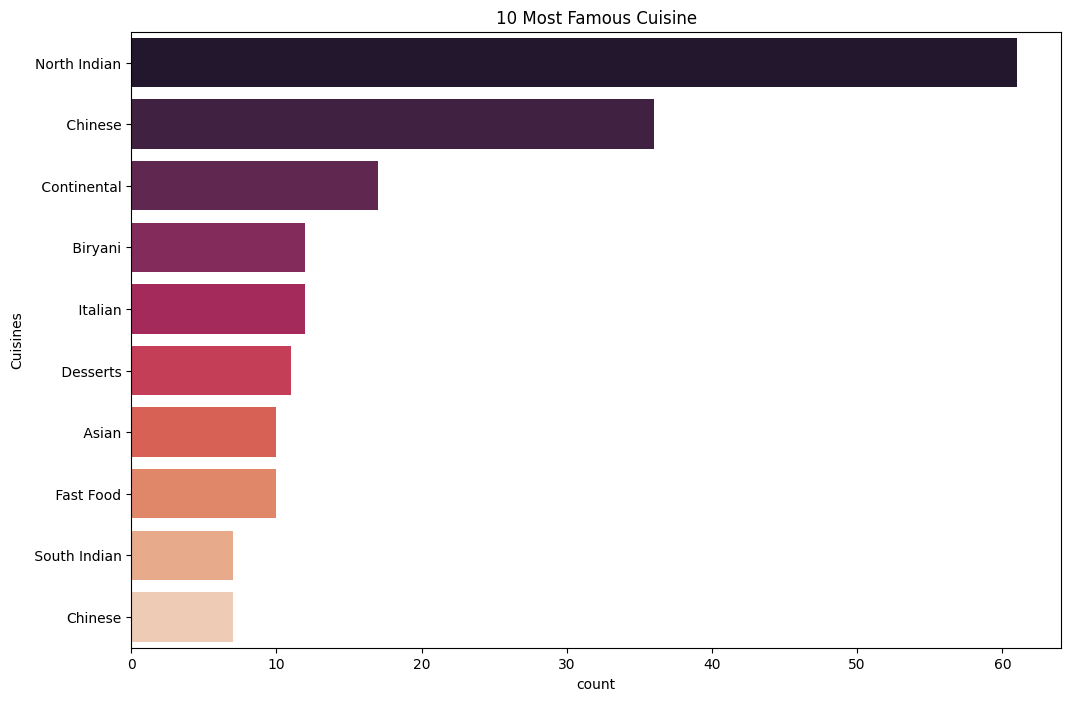

In [ ]:
#visualisation of most famous cuisines
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='rocket')
plt.title('10 Most Famous Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

Indeed, bar charts are a suitable choice for visualizing categorical features, making them a great option for representing data like the top 10 popular cuisines. In this context, the selected bar chart effectively illustrates the ten most renowned cuisines, allowing for a clear and straightforward understanding of their popularity.

##### 2. What is/are the insight(s) found from the chart?

It can be clearly seen that North Indian cuisine is most commonly served in restaurants, followed by Chinese and Continental cuisine.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be helpful for new entrepreneurs who want to open new restaurants in their area, so they can learn what people like most and add that cuisine to their menu.

#### Chart - 3

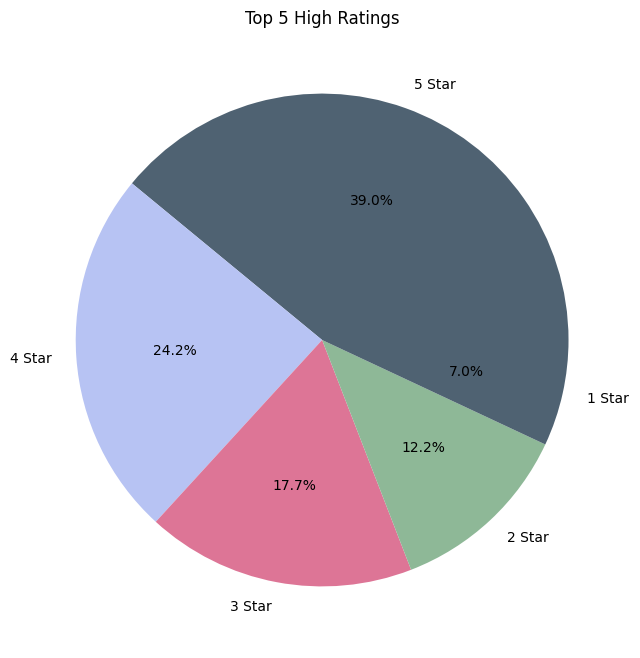

In [ ]:
# Chart - 3 visualization code
# Pie Plot of Total count of ratings from 1 star to 5 star
plt.figure(figsize=(15,8))
x_label = review['Rating'].value_counts().index
y_label = review['Rating'].value_counts().values
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
keys = [ '5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
plt.pie(x = y_label[:5], labels = keys, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 High Ratings', color= 'black')
plt.show()


##### 1. Why did you pick the specific chart?


 A pie chart is indeed ideal for depicting the part-whole relationship within data. Each slice of the chart represents a proportion of the whole, and when combined, they make up the entire "pie," which signifies 100% of the whole. This visualization method effectively communicates the distribution of data across various categories, whether it's related to space types, neighborhood groups, or neighborhoods themselves.

##### 2. What is/are the insight(s) found from the chart?


The diagram reveals that a significant majority of the restaurants have earned high ratings of 4 and 5 stars, constituting 39% and 24.2% of the total, respectively. In contrast, restaurants receiving a low rating of just 1 star account for only a small portion, comprising a mere 7% of the overall ratings. This highlights the prevalence of positive reviews and suggests that the majority of diners have had favorable experiences at these establishments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We have found that a smaller number of different types of dishes can affect the image of the restaurant, as customers are primarily looking for the different types of dishes according to their preferences.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
reviewer_list = review.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

Reviewer  Review_Count
655         Ankita            13
3858   Parijat Ray            13
2654         Kiran            12
2313     Jay Mehta            11
7013  Vedant Killa            11

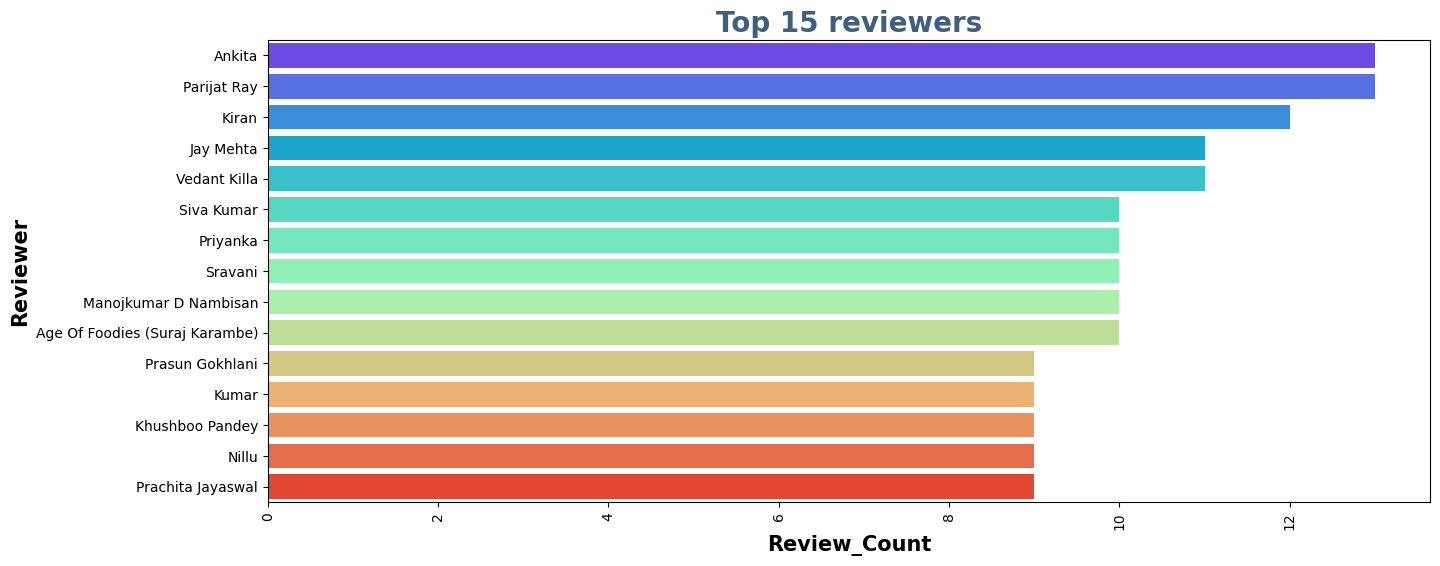

In [ ]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

##### 1. Why did you pick the specific chart?


The bar chart is a univariate chart that excels in depicting various observations related to a single characteristic. In this particular chart, it has been employed to effectively showcase the top reviewers who have contributed the highest number of reviews.

##### 2. What is/are the insight(s) found from the chart?


Based on the information provided in the diagram, it's evident that the reviewer named Ankita has bestowed the highest ratings, exceeding a remarkable total of 12. This suggests that Ankita has consistently offered exceedingly positive reviews and has likely had a significant impact on the restaurant's overall ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top reviewers will always check the reviews before going to a restaurants, so it's essential to strive for positive reviews from the majority of them.

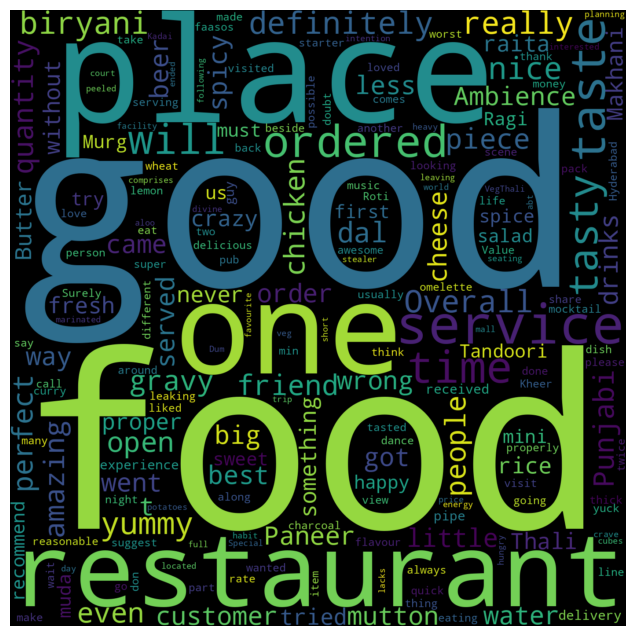

In [ ]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")
plt.show()

#### Chart - 5

In [ ]:
# Review per hour
reviews_hour = review.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

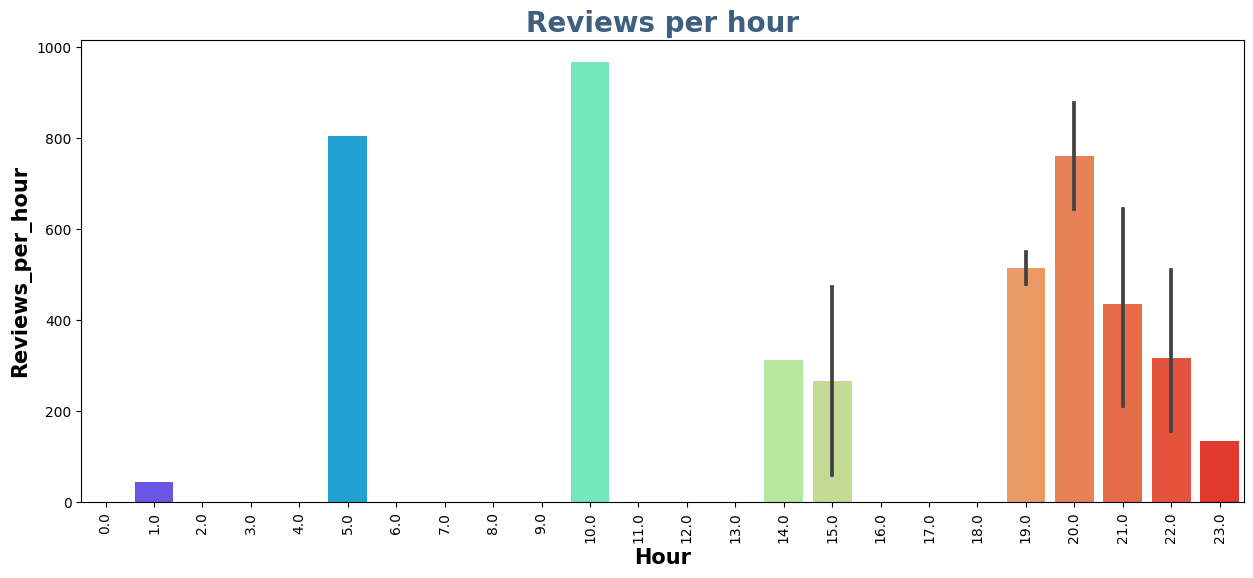

In [ ]:
# Chart - 5 visualization code
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = review['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()


##### 1. Why did you pick the specific chart?

Barplot shows the observations in each categorical bin using bars. The above chart is the reviews per hour v/s hours

##### 2. What is/are the insight(s) found from the chart?

As we can see, there is an increase in reviews from the afternoon to midnight. This is likely due to the fact that most people are working or at school during the morning hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the graph, a restaurant owner can decide on the peak times when most customers visit, so they can prepare the most food during those times.

#### Chart - 6

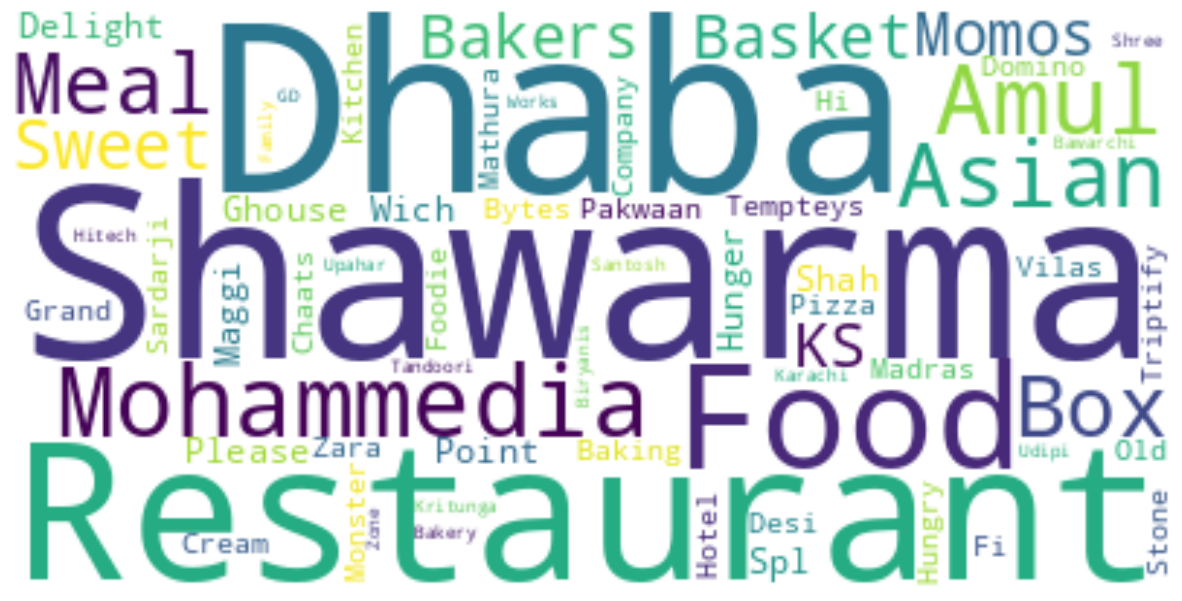

In [ ]:
# Chart - 6 visualization code
#CREATING WORDCLOUD FOR CHEAPEST RESTAURANT
plt.figure(figsize=(15,8))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=True).Name[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")
plt.show()

(-0.5, 1999.5, 1999.5, -0.5)

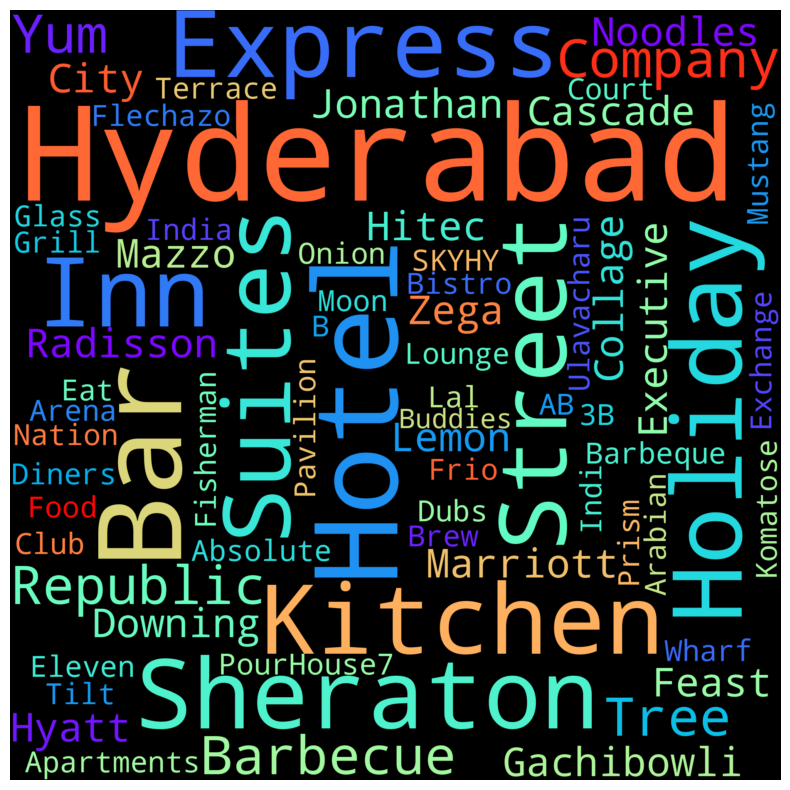

In [ ]:
#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

##### 1. Why did you pick the specific chart?


Using a Wordcloud is an excellent choice because it effectively displays all the text data while emphasizing the most frequently occurring words. This visual representation allows for a quick and intuitive understanding of the key themes or commonly used words within the text, making it a valuable tool for text analysis and visualization.

##### 2. What is/are the insight(s) found from the chart?


Based on the insights gained from the chart, it's evident that certain words repeat more frequently for expensive and cheap restaurants.

For expensive restaurants, words like "HYDERABAD," "HOTEL," and "BAR" are the most prominent. This suggests that restaurants associated with hotels and bars in Hyderabad tend to be on the pricier side.

Conversely, for cheaper restaurants, words like "SHAWARMA," "DHABA," and "RESTAURANTS" stand out as the most frequently recurring. This implies that shawarma joints, dhabas, and standalone restaurants are more budget-friendly dining options.

These observations offer valuable information about the types of establishments and cuisine styles that tend to be more expensive or affordable in the context of the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above wordcloud a customer will strike the repeating words.

#### Chart - 7

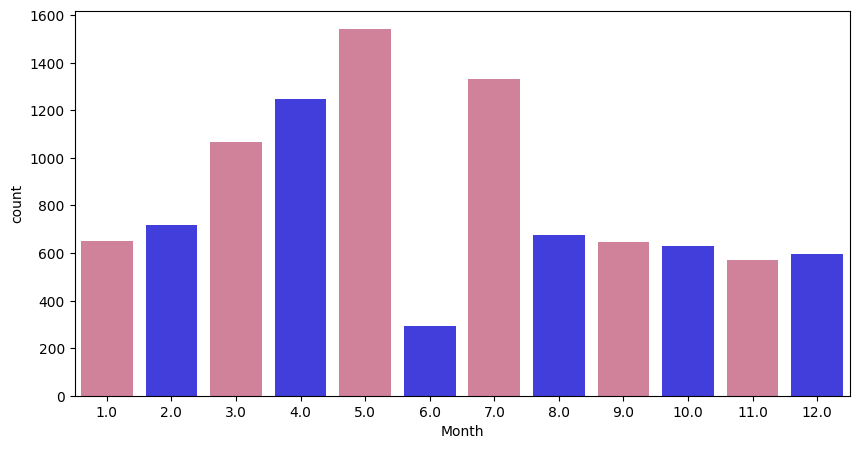

In [ ]:
# Chart - 7 visualization code
#count plot of review w.r.t month
plt.figure(figsize=(10,5))
sns.countplot(x=review['Month'],palette=['#DD7596','#2724F6'])
plt.show()

##### 1. Why did you pick the specific chart?

The count plot is a visual representation that displays the number of observations falling into each categorical bin using bars. It is typically used for categorical data rather than quantitative variables. In the chart you've described, a count plot has been employed to showcase the frequency of reviews during different months, allowing us to identify the month with the highest number of reviews.

##### 2. What is/are the insight(s) found from the chart?

The count plot you've presented provides a clear visual representation of the review activity for restaurants during different months. It's evident from the chart that the month of May attracted the highest number of customers who left reviews, while the month of July witnessed the lowest review activity. This information underscores the seasonal variations in customer feedback and can be valuable for businesses and platforms like Zomato to understand and manage review trends over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to the above diagram, a restaurant owner can determine the busiest month by analyzing high review ratings, indicating that more customers visited the restaurant during that time.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# No of reviews given to the restaurants
res_review=review[['Restaurant', 'No_of_reviews']].sort_values(by = 'No_of_reviews', ascending = False).head(20).reset_index(drop=True)
res_review

Restaurant  No_of_reviews
0                               Pista House         1031.0
1                                   Labonel         1031.0
2      Collage - Hyatt Hyderabad Gachibowli         1031.0
3                               Owm Nom Nom          685.0
4             The Old Madras Baking Company          665.0
5                              Aromas@11SIX          560.0
6                         Hyderabadi Daawat          482.0
7                          Chinese Pavilion          472.0
8                                  Tempteys          452.0
9             The Old Madras Baking Company          452.0
10  Cascade - Radisson Hyderabad Hitec City          452.0
11                                  T Grill          443.0
12                              Pista House          443.0
13                          Diners Pavilion          443.0
14                            Momos Delight          443.0
15                                KS Bakers          443.0
16                 Shah Ghouse Spl Shawarma          443.0
17  Cascade - Radisson Hyderabad Hitec City          417.0
18  Cascade - Radisson Hyderabad Hitec City          414.0
19                             Karachi Cafe          411.0

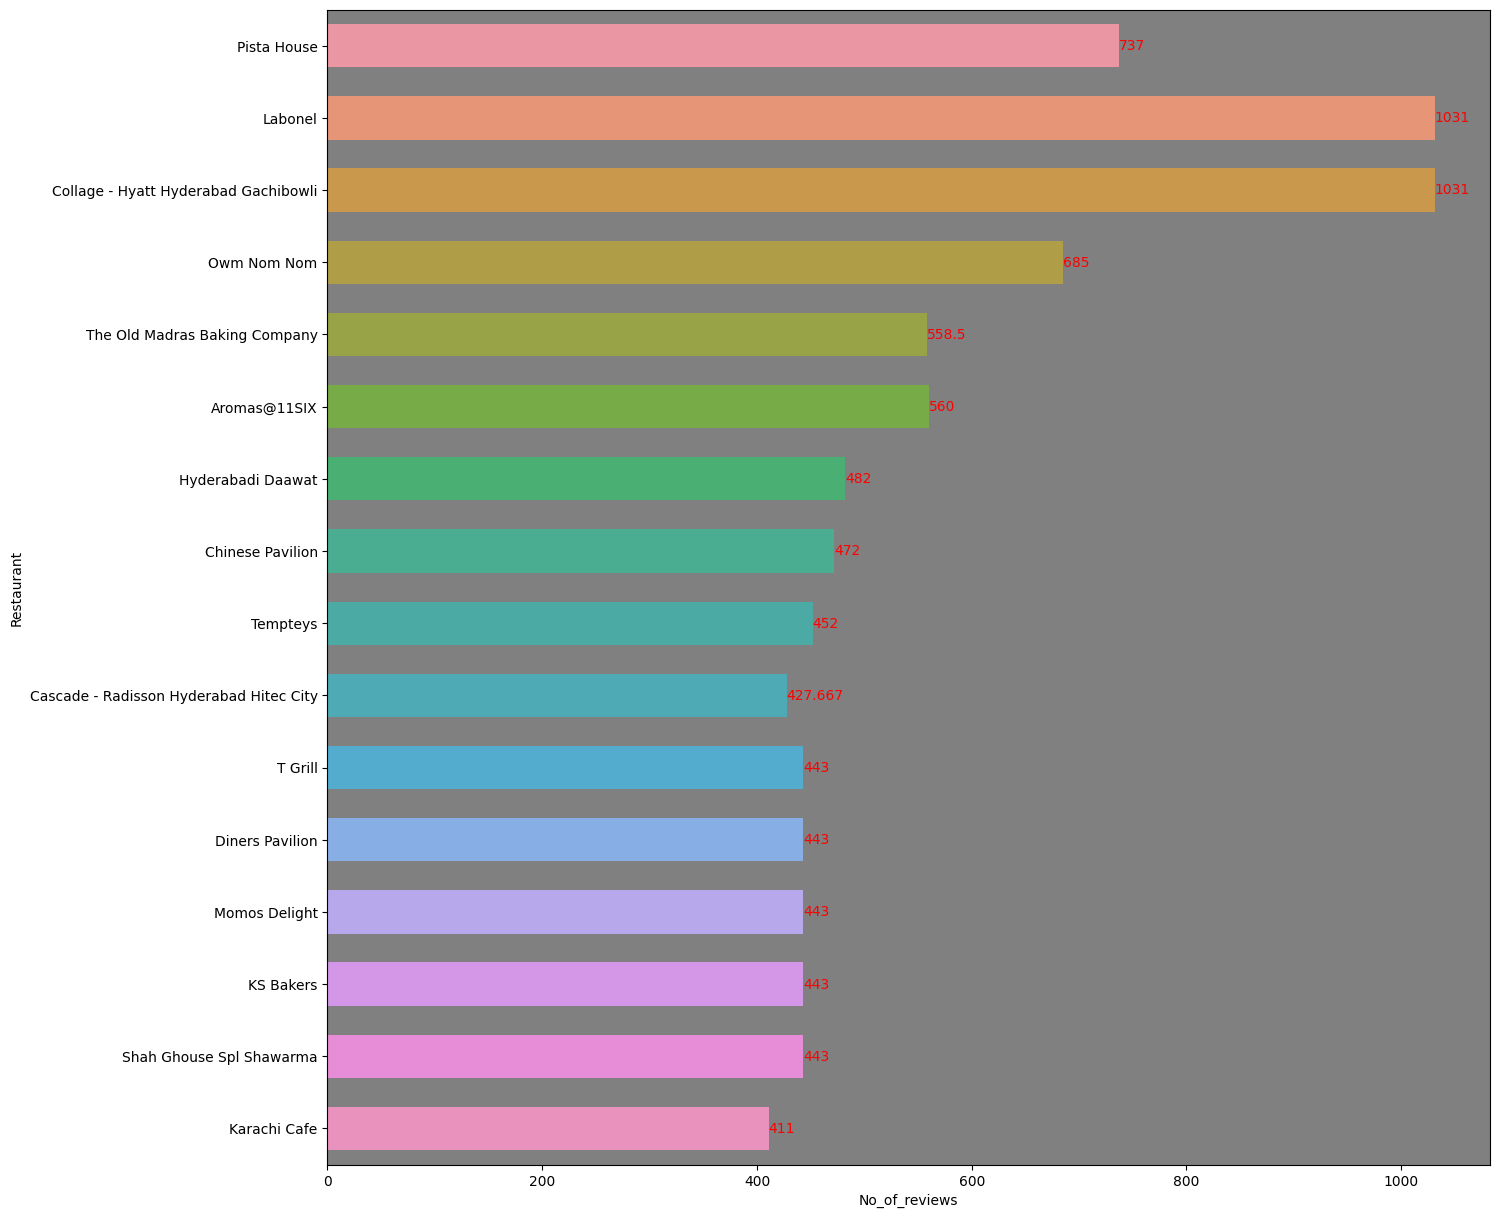

In [ ]:
# No of reviews for top 20 restaurants(by reviews)
plt.figure(figsize = (15,15))
ax = sns.barplot(x = 'No_of_reviews',y = 'Restaurant',data = res_review,errwidth = 0, width = 0.6)
ax.set_facecolor("Grey")
ax.bar_label(ax.containers[0], color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

In order to determine which restaurants have received the highest number of reviews.

##### 2. What is/are the insight(s) found from the chart?

Here, Labonel and Collage at the Hyatt Hyderabad Gachibowli, with a total of 1031 positive reviews, are the most highly rated restaurants, making them a great choice.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# TOTAL Followers of reviewers FOR THE PARTICULAR RESTAURANT
follower_count=pd.DataFrame(review[['Restaurant', 'Followers']]
                       .groupby(by='Restaurant',as_index=False)['Followers'].sum()
                       .sort_values(by='Followers',ascending=False).reset_index(drop=True))


In [ ]:
# Restaurants with highest number of reviewer followers
follower_top10=follower_count.head(10)
follower_top10

Restaurant  Followers
0                              Pista House      51068
1  Komatose - Holiday Inn Express & Suites      46229
2                        Hyderabadi Daawat      45375
3                    The Tilt Bar Republic      42126
4                           Dunkin' Donuts      37667
5                         Chinese Pavilion      35426
6                                   Faasos      34640
7                                  T Grill      32222
8  Cascade - Radisson Hyderabad Hitec City      31644
9                          Barbeque Nation      30866

In [ ]:
# Restaurants with lowest number of reviewer followers
follower_bottom10=follower_count.tail(10)
follower_bottom10

Restaurant  Followers
90                               Flechazo       2748
91                    Kritunga Restaurant       2223
92                       Hotel Zara Hi-Fi       1818
93         3B's - Buddies, Bar & Barbecue       1676
94                 Royal Spicy Restaurant       1497
95                               Delhi-39       1222
96              AB's - Absolute Barbecues       1060
97                               Paradise        798
98                    Mohammedia Shawarma        791
99  Shree Santosh Dhaba Family Restaurant        562

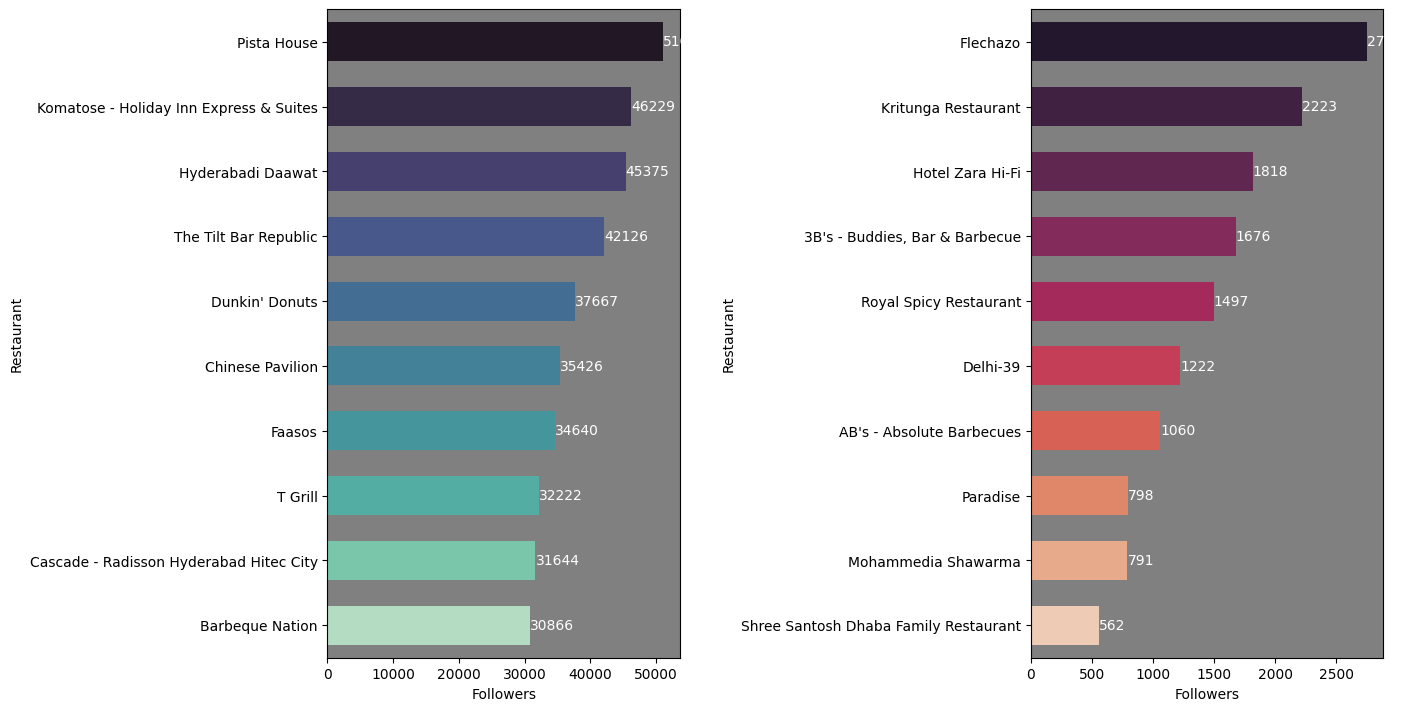

In [ ]:
# Visualizing it through bar graph
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of followers
a = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_top10 ,palette = "mako",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("red")
a.bar_label(a.containers[0], color= 'White')
a.set_yticklabels(labels=follower_top10['Restaurant'].to_list())
a.set_facecolor("grey")

# Visualization of bottom 10 restaurants with lowest number of followers
b = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_bottom10 ,palette = 'rocket',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("red")
b.bar_label(b.containers[0], color= 'White')
b.set_yticklabels(labels=follower_bottom10['Restaurant'].to_list())
b.set_facecolor("grey")

##### 1. Why did you pick the specific chart?

A barplot is a suitable visualization method for comparing the number of followers among reviewers of restaurants. It can effectively display both the least and most followed reviewers, making it a useful tool for understanding the reviewer community's reach and influence on restaurant reviews.

##### 2. What is/are the insight(s) found from the chart?

 "Pista House" enjoys the highest number of followers among restaurant reviewers, signifying a significant level of influence or popularity. On the other hand, the reviewers linked to "Shree Santosh Dhaba Family Restaurant" have the fewest followers, suggesting a relatively smaller online following within the reviewer community. These insights shed light on the varying degrees of influence and reach among restaurant reviewers on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Bussiness men can find the trend of the customers.

#### Chart - 10 - Correlation Heatmap

In [ ]:
#changing the name of the column to restaurant_name
hotel.rename({'Name':'Restaurant_name'},axis=1, inplace=True )
hotel.head(2)

Restaurant_name                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1         Paradise  https://www.zomato.com/hyderabad/paradise-gach...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   

                                         Timings  No_of_cuisine  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)              6  
1                                 11 AM to 11 PM              3

In [ ]:
#changing the restuarant column name to restaurant_name
review.rename({'Restaurant':'Restaurant_name'},axis=1, inplace=True )
review.head(2)

Restaurant_name              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   

                 Time  Pictures  No_of_reviews  Followers    Year  Month  \
0 2019-05-25 15:54:00         0            1.0          2  2019.0    5.0   
1 2019-05-25 14:20:00         0            3.0          2  2019.0    5.0   

   Hour  Review_count  
0  15.0             1  
1  14.0             3

In [ ]:
# merging both the data together on Restaurant_name column
zomato_df = pd.merge(hotel, review.drop_duplicates(), on = 'Restaurant_name', how='left')
zomato_df.shape

(9968, 18)

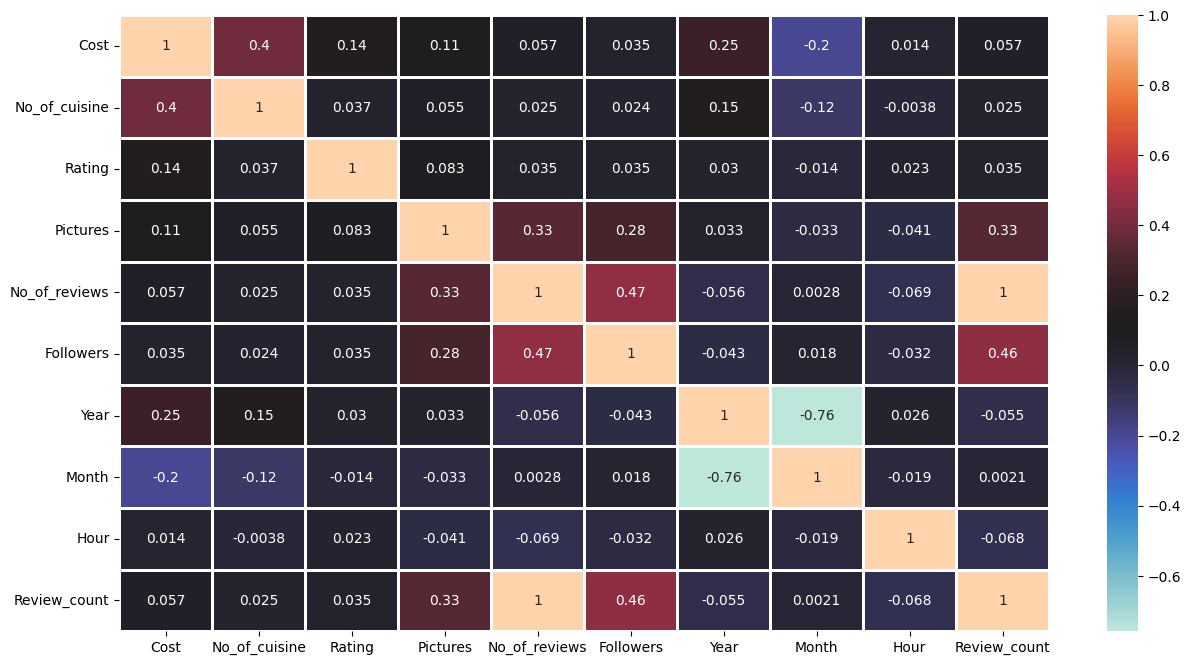

In [ ]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(zomato_df.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a structured table that presents correlation coefficients between different variables. It serves multiple purposes, including summarizing data relationships and providing valuable input for more advanced analyses. The correlation coefficient, which can range from -1 to 1, quantifies the strength and direction of the relationship between variables. A positive correlation coefficient indicates a positive relationship, a negative coefficient indicates a negative relationship, and a coefficient of zero suggests no correlation between the variables. Correlation matrices are valuable tools for understanding and exploring the connections within datasets and can also be used for diagnostic purposes in statistical analyses.

##### 2. What is/are the insight(s) found from the chart?

1.There's a 46% positive correlation between Review_count and Followers. This suggests that as the number of reviews increases, there tends to be a corresponding increase in the number of followers for reviewers.

2.There's a positive correlation between Cuisine_count and cost, implying that restaurants offering a greater variety of cuisines tend to have higher costs compared to those with a smaller culinary selection. This correlation aligns with the expectation that more extensive menus or diverse cuisines can be associated with higher prices.

3.A 35% positive correlation exists between Review_count and Ratings. This indicates that as the number of reviews grows, there is a tendency for higher ratings. In other words, restaurants with more reviews tend to receive better ratings.

Overall,the observation is that there is no strong correlation between these variables, as none of the correlations reach close to a correlation coefficient of 1 or -1. These insights help in understanding the relationships between these factors without indicating a dominant or deterministic connection among them.






#### Chart - 11 - Pair Plot

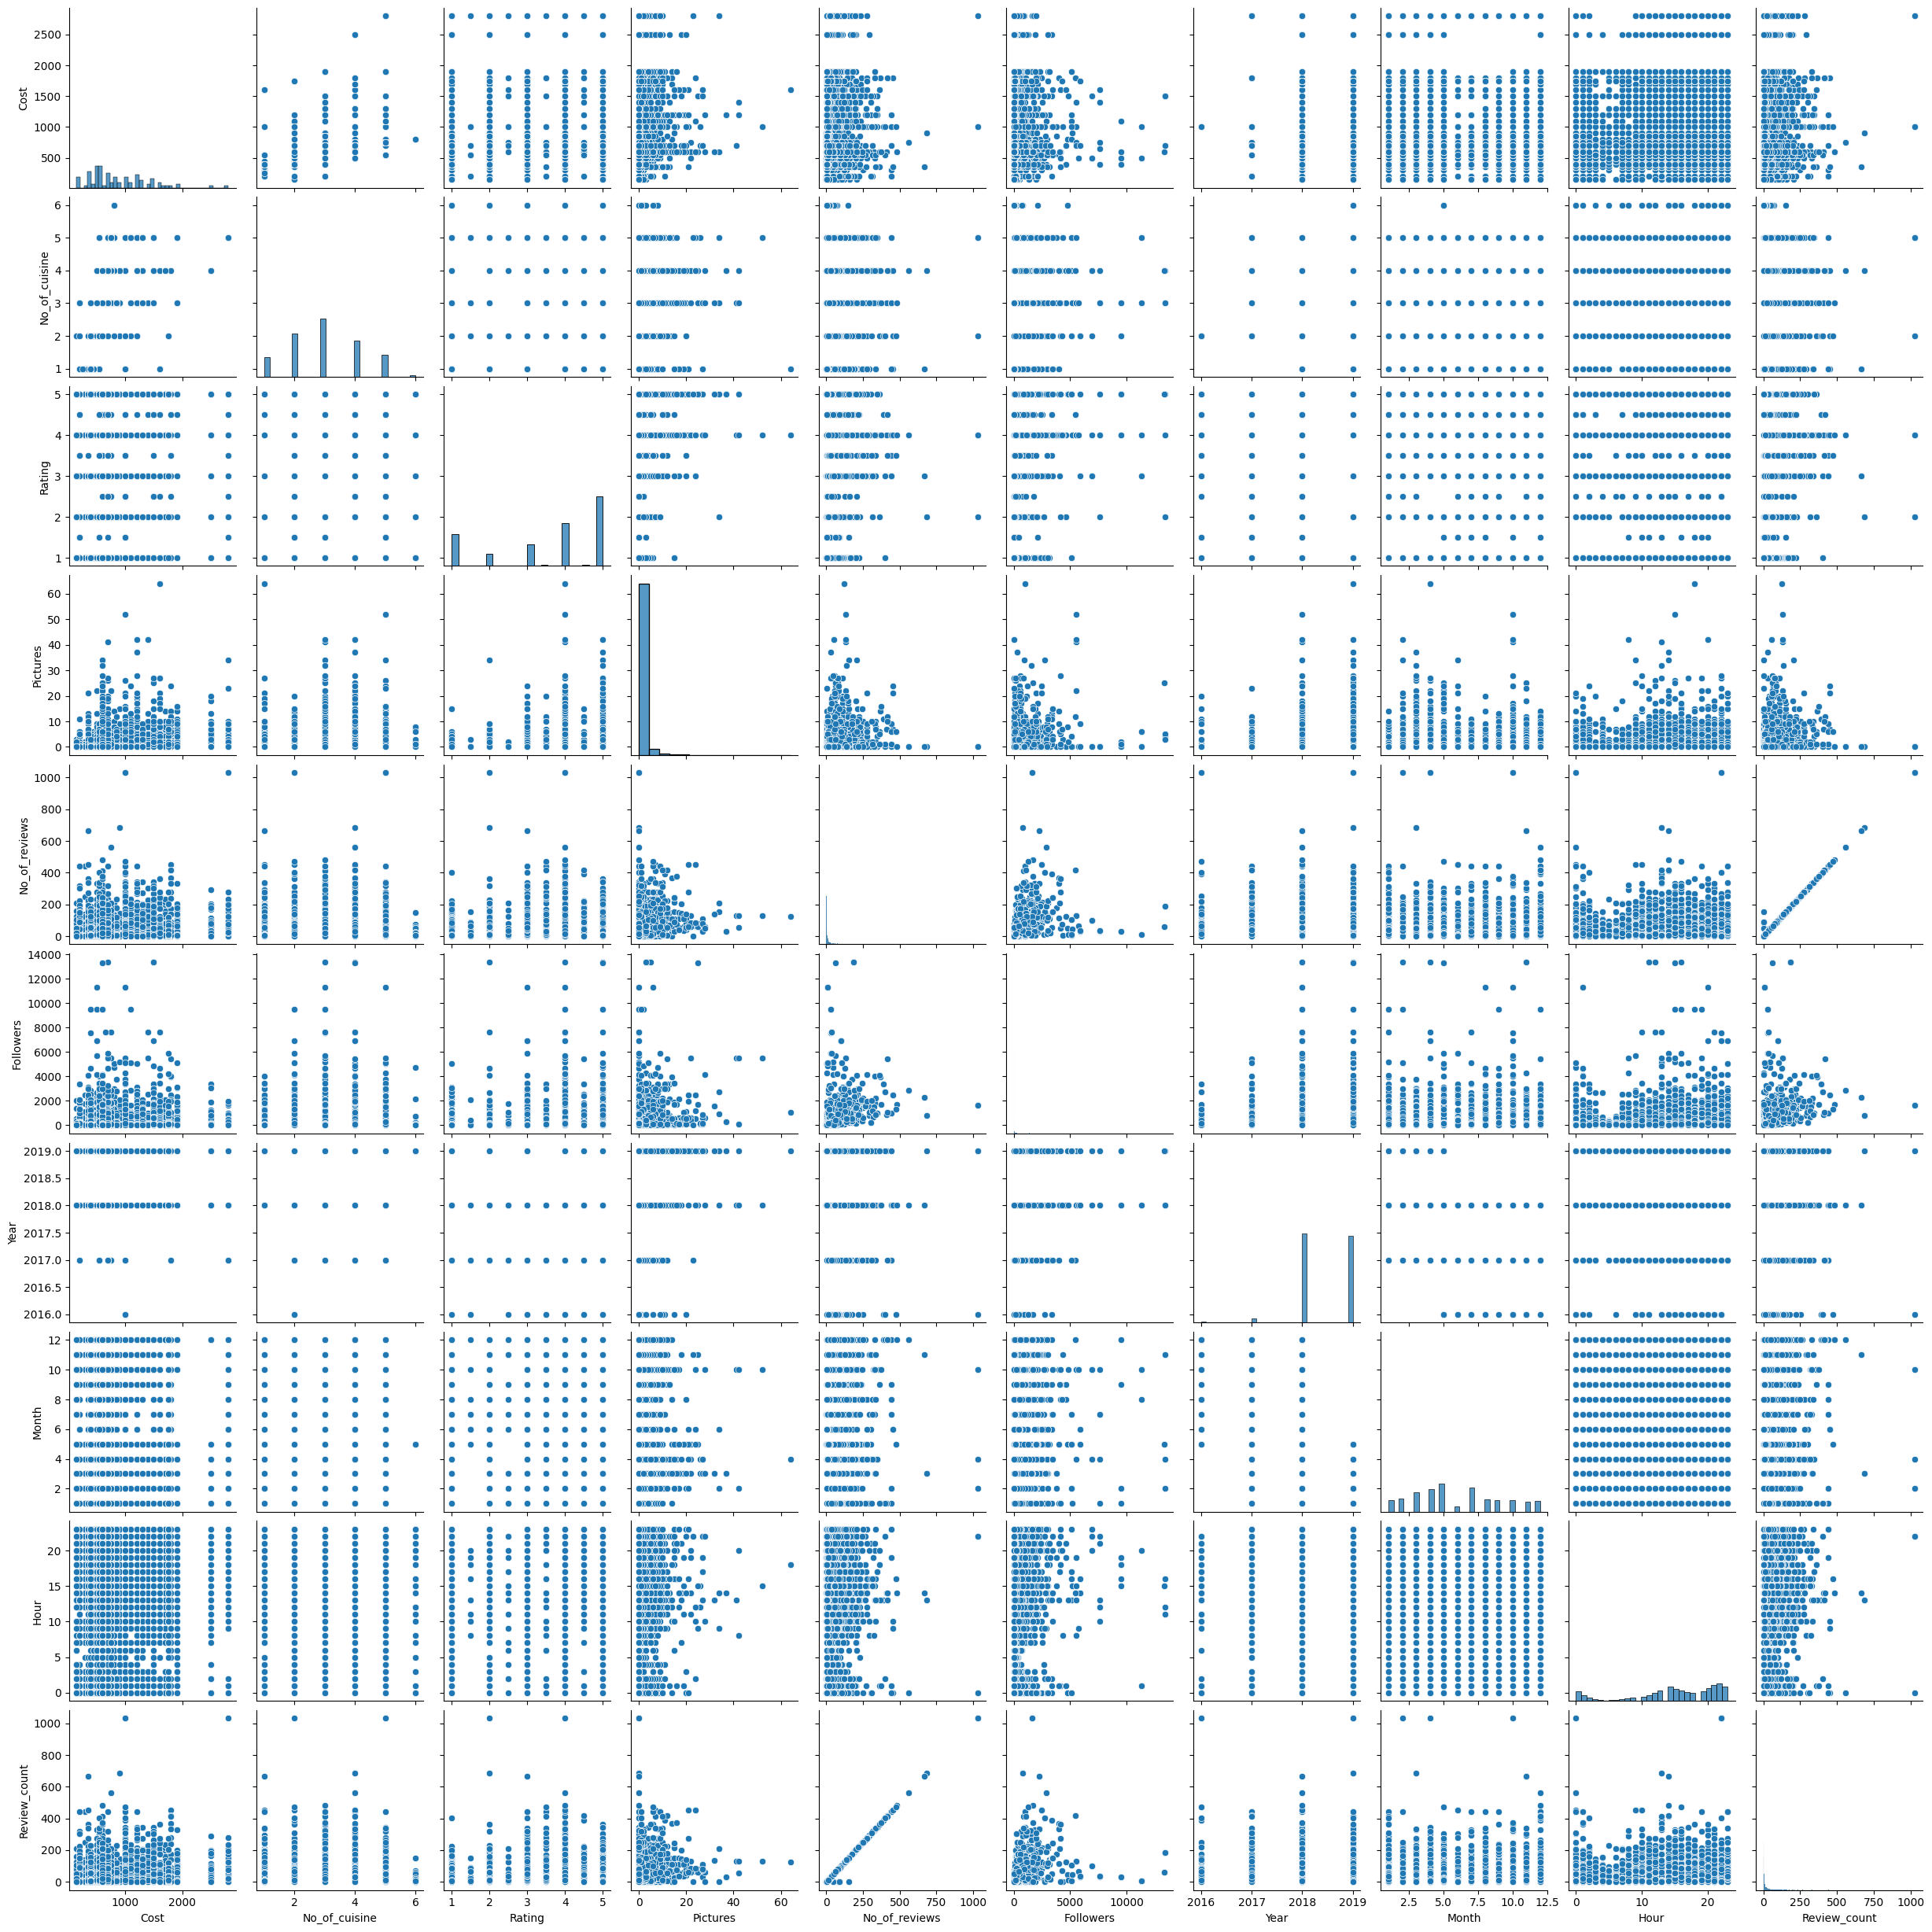

In [ ]:
# Pair Plot visualization code
sns.pairplot(zomato_df)
plt.show()

##### 1. Why did you pick the specific chart?

 Pair plots are indeed valuable tools for gaining insights into the relationships between two variables, identifying clusters in data, and even creating basic classification models. They provide a visual representation of patterns and relationships within a dataset, somewhat akin to a correlation map. By examining the scatterplots and histograms in a pair plot, you can uncover valuable information about the data's structure and interdependencies, aiding in both exploratory data analysis and model building.







There is no significant correlation between the given features in the merged dataframe.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Let's copy the original data and work on copied dataset
hotel_df=hotel.copy()
review_df=review.copy()

## Hotel dataset

In [ ]:
#Function to see the percent of missing value
def null_value_per(df):

  null_df=pd.DataFrame()
  null_count=df.isnull().sum()
  null_per = null_count/df.shape[0]*100
  null_df['Null_Count']=null_count
  null_df['Null_percent']=null_per

  return null_df

In [ ]:
# Check for null values in hotel_df

hotel_null_values = null_value_per(hotel_df)
hotel_null_values

Null_Count  Null_percent
Restaurant_name           0      0.000000
Links                     0      0.000000
Cost                      0      0.000000
Collections              54     51.428571
Cuisines                  0      0.000000
Timings                   1      0.952381
No_of_cuisine             0      0.000000

There is 1 null value in the Timings column, so we can fill it in with the mode of the column. The Collections column has more than 50% null values, so we should drop it. The Links column is not useful for data analysis, so we will also drop it. Now, let's check for one missing value in the Timings column.

In [ ]:
# checking for one missing value in Timings
hotel_df[hotel_df['Timings'].isnull()]

Restaurant_name                                              Links  Cost  \
30      Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  No_of_cuisine  
30         NaN  Andhra, South Indian, North Indian     NaN              3

In [ ]:
# Imputing timings missing value with mode of that column
from pandas._libs.hashtable import mode
hotel_df['Timings'].fillna(hotel_df.Timings.mode()[0],inplace = True)

In [ ]:
# Dropping the columns collection and Links
hotel_df.drop(columns = ['Collections'],axis = 1,inplace = True)

## Review dataset

In [ ]:
## Check for null values in review_df
review_null_values = null_value_per(review_df)
review_null_values

Null_Count  Null_percent
Restaurant_name           0      0.000000
Reviewer                 38      0.380038
Review                   45      0.450045
Rating                   38      0.380038
Time                     38      0.380038
Pictures                  0      0.000000
No_of_reviews            38      0.380038
Followers                 0      0.000000
Year                     38      0.380038
Month                    38      0.380038
Hour                     38      0.380038
Review_count              0      0.000000

In [ ]:
#filling null values in review_df  review column
review_df = review_df.fillna({"Review": "No Review"})

#### What all missing value imputation techniques have you used and why did you use those techniques?

For hotel dataset:
* The one null value in Timings was imputed using the mode of the column, since it is assumed that opening and closing times are similar for most restaurants.
* Since the collections contain more than 50% null values, this column was deleted.

For the Ratings dataset:
* Ratings column is missing values, so it was populated with 'No rating'.

### 2. Handling Outliers

### Anamoly Detection

In [ ]:
#function to plot for outlier detection
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])

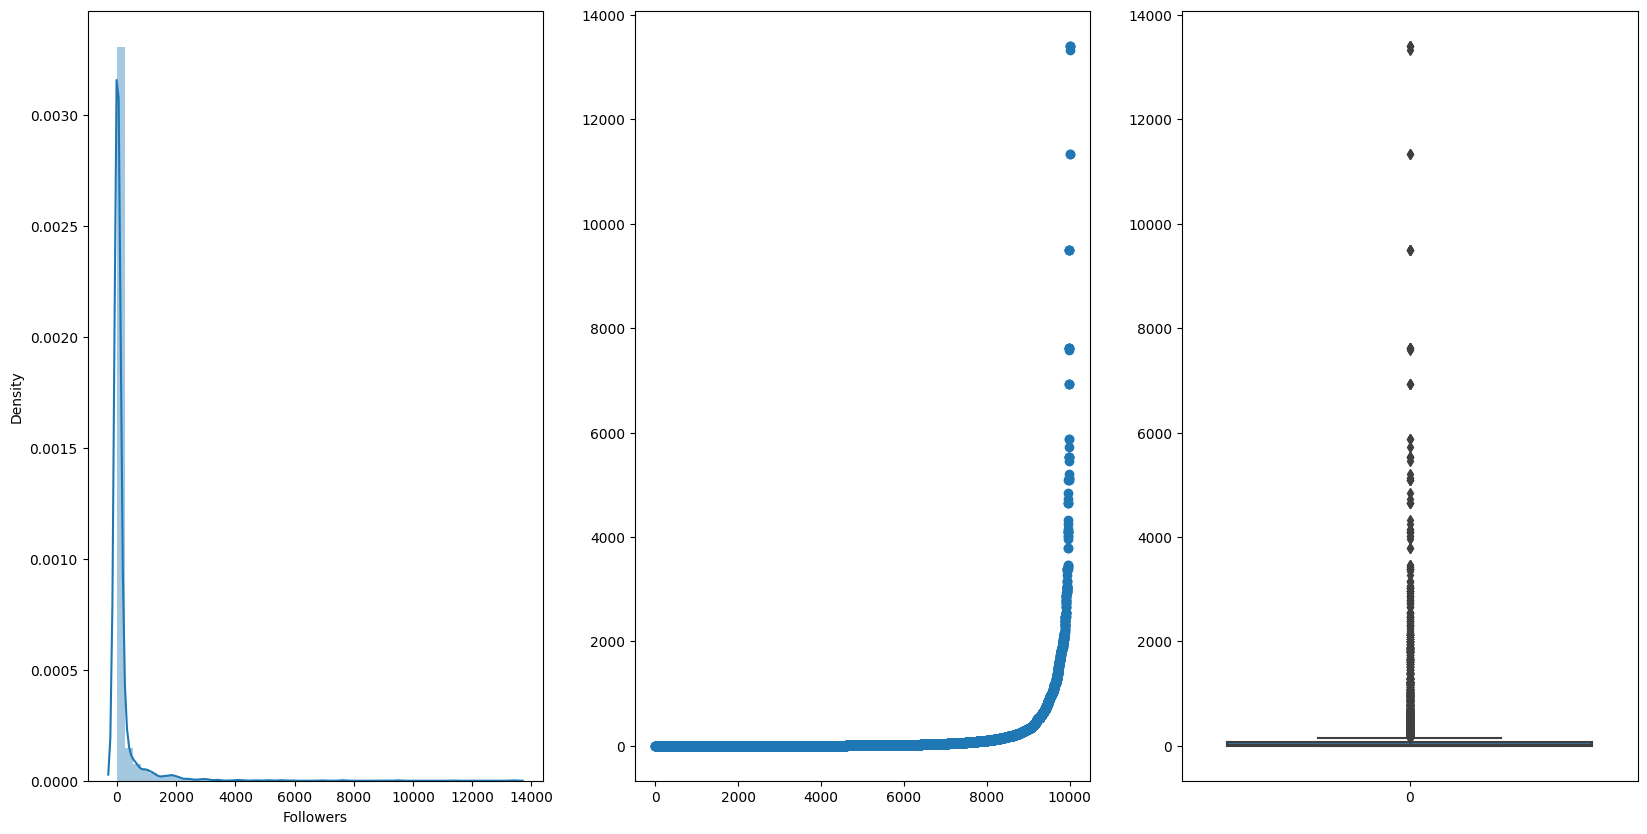

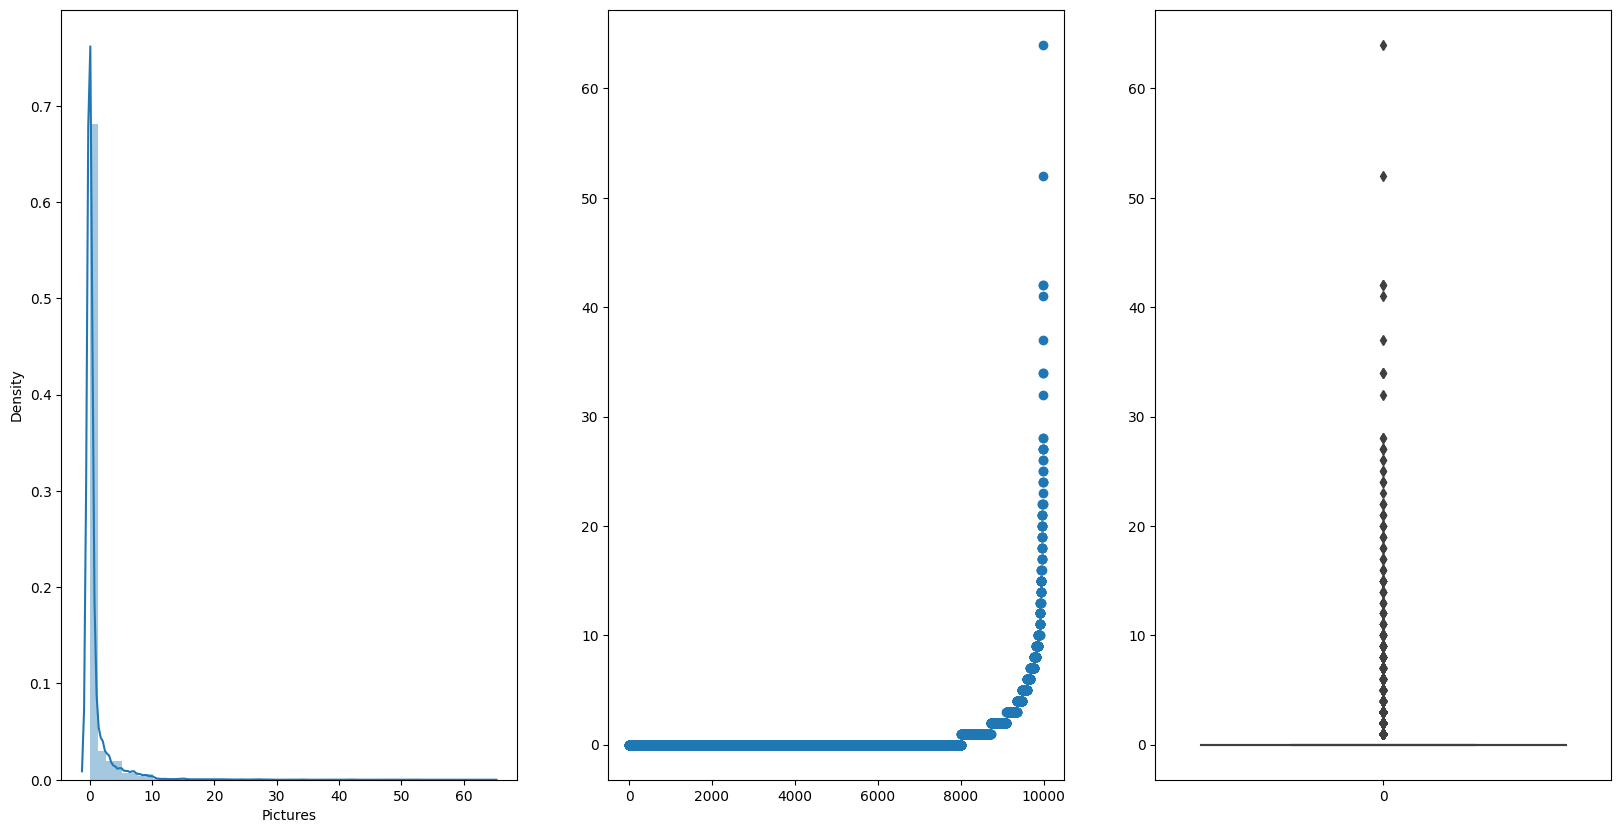

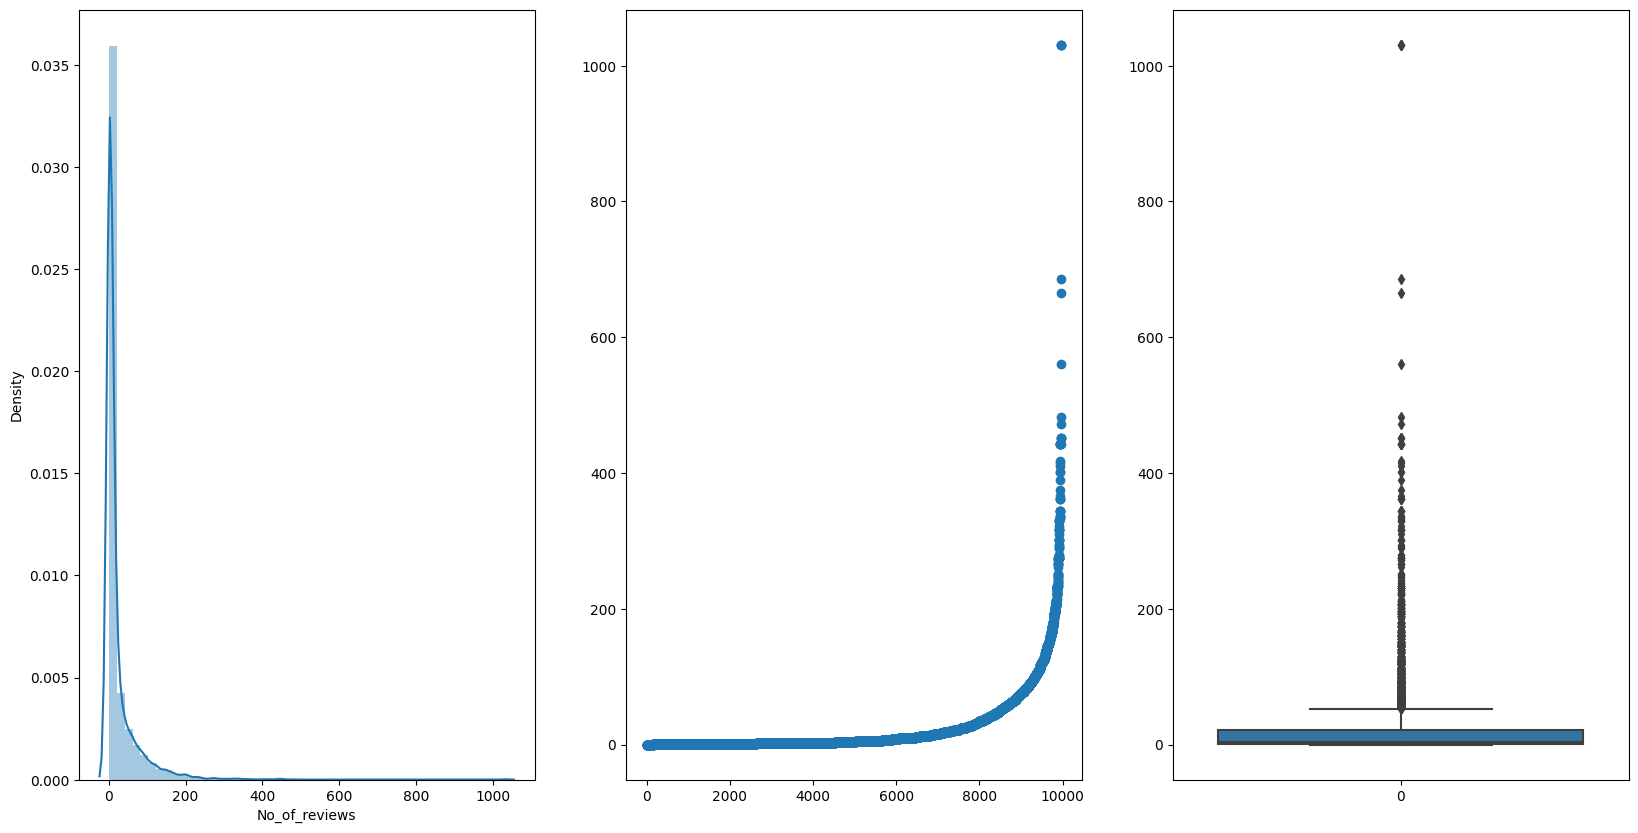

In [ ]:
# Getting outliers for review dataset
outlier_plots(review_df,['Followers','Pictures','No_of_reviews'])

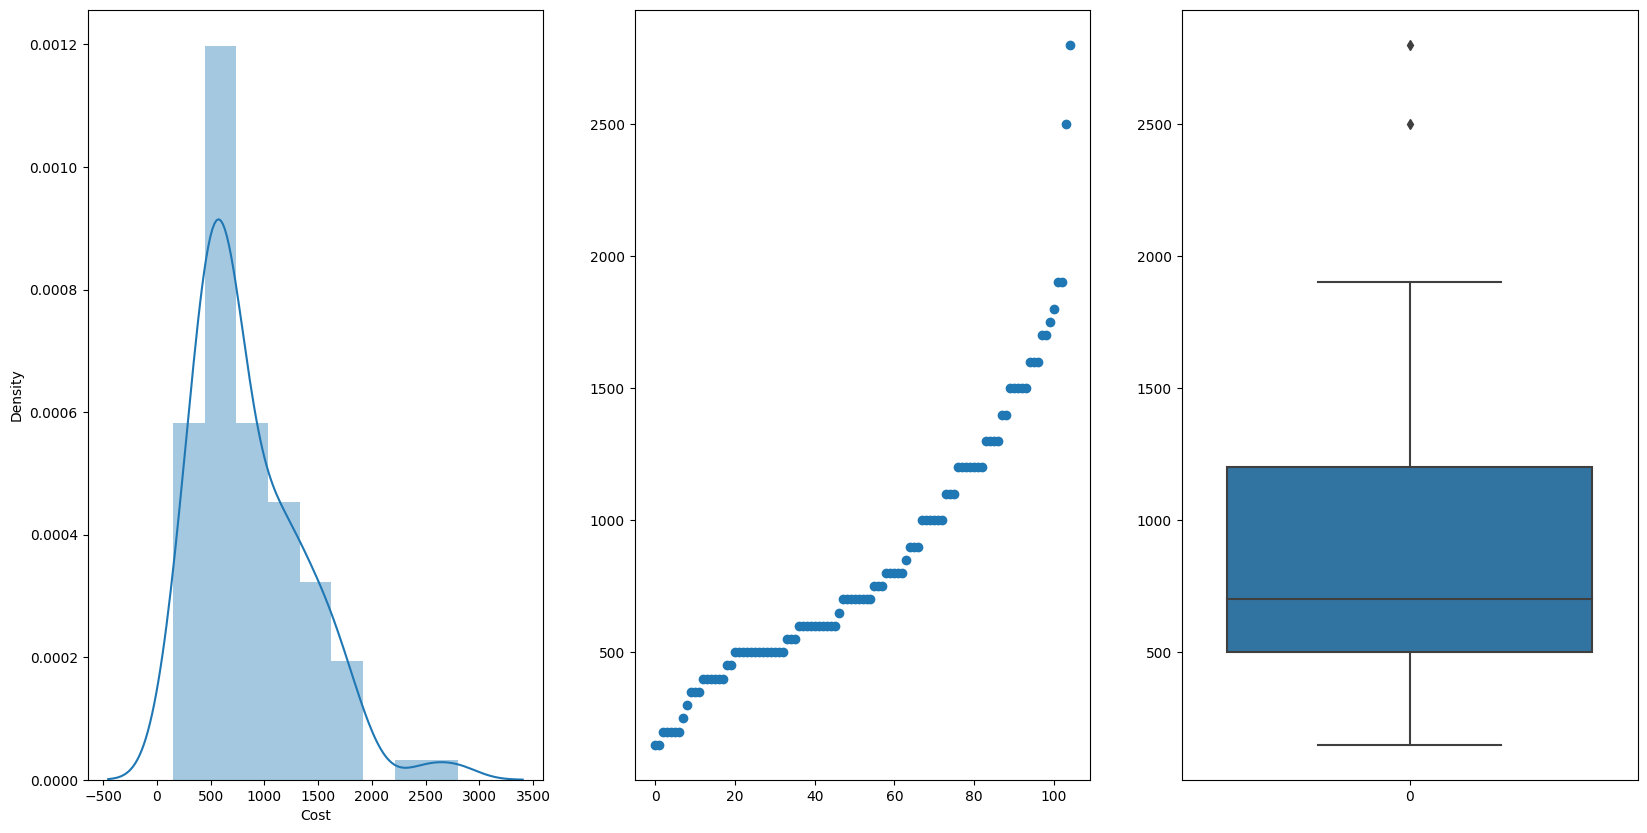

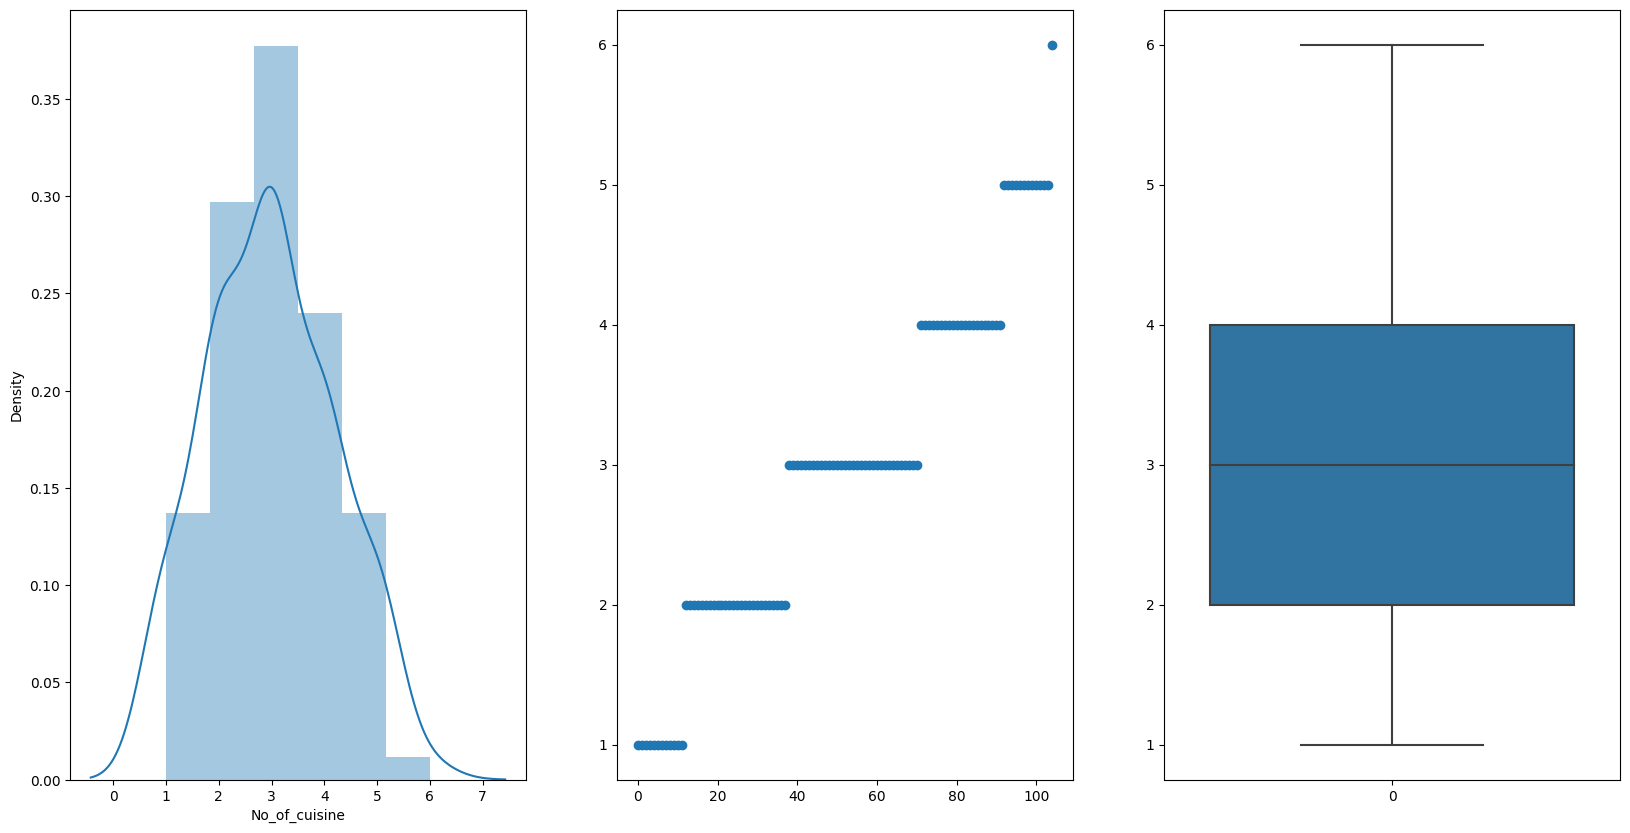

In [ ]:
# getting outliers for hotel dataset
outlier_plots(hotel_df,['Cost','No_of_cuisine'])

In [ ]:
#isolation forest for anamoly detection on cost
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(hotel_df['Cost'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

In [ ]:
# fitting and plotting of outliers
def visualize_outliers(df,features):
  '''Function for fitting and getting plot for outliers'''
  #isolation forest for anamoly detection on cost
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
  isolation_forest.fit(df[features].values.reshape(-1, 1))

  #chart to visualize outliers
  xx = np.linspace(df[features].min(), df[features].max(), len(df)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize=(10,4))
  plt.plot(xx, anomaly_score, label='anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
  where=outlier==-1, color='y',
  alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(features)
  plt.show();

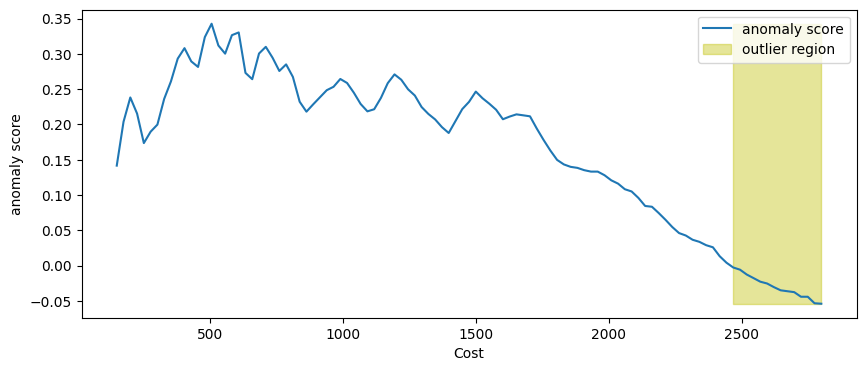

In [ ]:
#visualizing outlier for cost
visualize_outliers(hotel_df,'Cost')

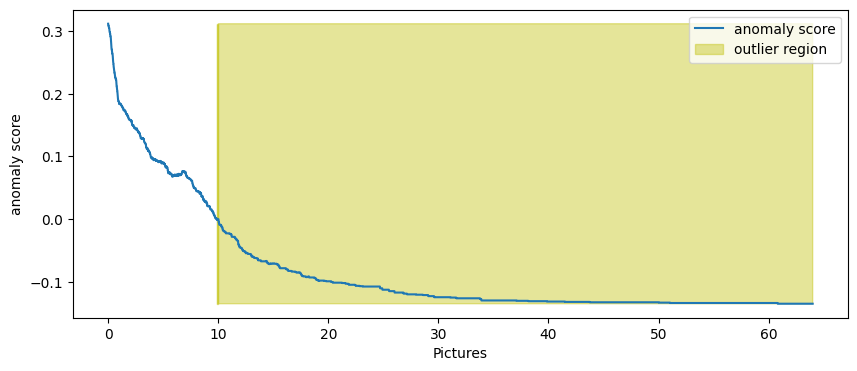

In [ ]:
#visualizing outlier for pictures
visualize_outliers(review_df,'Pictures')

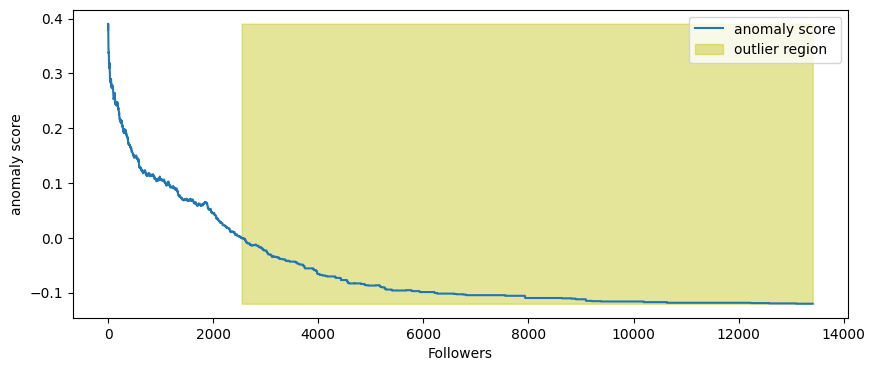

In [ ]:
#visualizing outlier for Followers
visualize_outliers(review_df,'Followers')

In [ ]:
# For Skew Symmetric features defining upper and lower boundry

def outlier_treatment_skew(df,feature):

  #inter quartile range
  IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_bound = df[feature].quantile(0.25) - 1.5*IQR
  upper_bound = df[feature].quantile(0.75) + 1.5*IQR
  # print(f'upper : {upper_bound} lower : {lower_bound}')
  return upper_bound,lower_bound

In [ ]:
# Restricting the data to lower and upper boundary for features in the dataset
def replace_outliers(df,features):

  #lower limit capping
  df.loc[df[features]<= outlier_treatment_skew(df=df,
                                               feature=features)[1], features]=outlier_treatment_skew(df=df,feature=features)[1]

#upper limit capping
  df.loc[df[features]>= outlier_treatment_skew(df=df,
                                               feature=features)[0], features]=outlier_treatment_skew(df=df,feature=features)[0]

In [ ]:
# Replace the outlier value with its upper bound and lower bound
replace_outliers(hotel_df,'Cost')
replace_outliers(review_df,'Pictures')
replace_outliers(review_df,'No_of_reviews')
replace_outliers(review_df,'Followers')

##### What all outlier treatment techniques have you used and why did you use those techniques?



1.Isolation Forest: Isolation Forest is an unsupervised outlier detection technique that leverages the idea that anomalies (outliers) are typically rare and isolated compared to normal data points. It constructs a decision tree structure where data points ending in shorter branches are considered anomalies, as they required fewer cuts to isolate them from the rest of the data. Conversely, data points deeper within the tree are less likely to be anomalies, as they required more splits to isolate them.

2.Outlier Treatment: After identifying outliers using the Isolation Forest, you've mentioned that upper outliers were replaced by an upper bound value, and lower outliers were replaced by a lower bound value. This is a common approach for handling outliers. By capping the extreme values with upper and lower bounds, you effectively control the impact of outliers on subsequent analyses or modeling. This is particularly useful when outliers might introduce noise or distort the results of statistical analyses or machine learning models.

### 3. Categorical Encoding

In [ ]:
hotel_df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Cuisines', 'Timings',
       'No_of_cuisine'],
      dtype='object')

In [ ]:
# create the new dataframe for clustering
# And have encoding on cuisines
cluster_df = hotel_df.drop([ 'Timings'],axis=1)
cluster_df.head()

Restaurant_name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  No_of_cuisine  
0  Chinese, Continental, Kebab, European, South I...              6  
1                     Biryani, North Indian, Chinese              3  
2       Asian, Mediterranean, North Indian, Desserts              4  
3  Biryani, North Indian, Chinese, Seafood, Bever...              5  
4  Asian, Continental, North Indian, Chinese, Med...              5

In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant_name  105 non-null    object
 1   Links            105 non-null    object
 2   Cost             105 non-null    int64 
 3   Cuisines         105 non-null    object
 4   No_of_cuisine    105 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.2+ KB


In [ ]:
# Encode your categorical columns
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_df = cluster_df.explode('Cuisines')

#removing extra trailing space from Cuisines after exploded
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for Cuisines
cluster_df = pd.get_dummies(cluster_df, columns=["Cuisines"], prefix=["Cuisines"])

In [ ]:
#grouping each restaurant as explode created unnecessary rows
cluster_df = cluster_df.groupby("Restaurant_name").sum().reset_index()

#### What all categorical encoding techniques have you used & why did you use those techniques?

For encoding of categorical feature 'Cuisines'," first divided the cuisines into a list and then created dummy variables for each of the cuisines and assigned them to the restaurants.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# creating datafame for sentiment analysis
sentiment_df = review_df[['Review', 'Rating']]

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(str(x)))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''This function is for removing punctuation'''
   # replacing the punctuations with no space, hence punctuation marks will be removed
  translator = text.translate(str.maketrans('', '', string.punctuation))
  # return the text stripped of punctuation marks
  return (translator)


In [ ]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [ ]:
sentiment_df.sample(3)

Review  Rating
9250  was here over the weekend this place was not c...     4.0
7752  had the chinese combo and the street food comb...     4.0
1338  you want to dance with these crazy people arou...     3.0

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#function to remove digits
def remove_digit(text):
  '''Function to remove digit from text'''
  char_str = '' .join((z for z in text if not z.isdigit()))
  return char_str

In [ ]:
#remove digit using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_digit)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# creating object for english stopwords
sw = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
# Installing and importing necessary libraries for removing emojis
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Function to transform the emojis to its respective text form, using UNICODE_EMOJI
def handle_emoji(text):
  for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(handle_emoji)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Not nedeed

#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [ ]:
sentiment_df.sample(3)

Review  Rating
8808  [pathetic, experience, never, order, outlet, n...     1.0
9028  [yesterday, went, place, service, slow, even, ...     1.0
7425  [tried, chessy, chicken, delight, jumbo, chick...     5.0

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  '''function for lemmatization'''
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I have used lemmatization as a text normalization technique.

In lemmatization, words are reduced to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word to determine its base form, whereas stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate method for determining the stem form of a word because it takes into account both the context of the word and its grammatical structure.

I used lemmatization because it is a more accurate method of reducing words to their root form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of words is important.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# Not needed

#### 10. Text Vectorization

In [ ]:
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
X = sentiment_df['Review']
X= vectorizer.fit_transform(X)

In [ ]:
# collect the vocabulary items used in the vectorizer to see them
dictionary = vectorizer.vocabulary_.items()
dictionary

dict_items([('ambience', 498), ('good', 6295), ('food', 5597), ('quite', 12170), ('saturday', 13248), ('lunch', 8898), ('cost', 3363), ('effective', 4675), ('place', 11438), ('sate', 13227), ('brunch', 2101), ('one', 10501), ('also', 417), ('chill', 2699), ('friend', 5828), ('parent', 10991), ('waiter', 16633), ('soumen', 14224), ('da', 3698), ('really', 12387), ('courteous', 3413), ('helpful', 6897), ('pleasant', 11541), ('evening', 4922), ('service', 13507), ('prompt', 11928), ('experience', 5096), ('kudos', 8359), ('must', 9899), ('try', 15943), ('great', 6500), ('thnx', 15527), ('pradeep', 11714), ('subroto', 14771), ('personal', 11275), ('recommendation', 12442), ('penne', 11204), ('alfredo', 335), ('pasta', 11067), ('music', 9873), ('background', 1191), ('amazing', 454), ('arun', 872), ('guy', 6644), ('behavior', 1493), ('sincerety', 13869), ('course', 3404), ('would', 17016), ('like', 8651), ('visit', 16553), ('goodwe', 6405), ('ordered', 10600), ('kodi', 8301), ('drumstick', 45

##### Which text vectorization technique have you used and why?


1.**TF-IDF Concept**: TF-IDF is a method for assigning weights to words in a document based on their importance. It calculates a weight for each word by considering its term frequency (tf) within the document and its inverse document frequency (idf) across the entire collection of documents.

2.**Term Frequency (tf)**: TF measures how often a word appears within a specific document. It indicates the importance of a word within that document.

3.**Inverse Document Frequency (idf)**: IDF assesses how rare or unique a word is across all documents in the collection. Words that are common across many documents receive a lower IDF score, while those that are rare receive a higher score.

4.**Purpose of TF-IDF**: TF-IDF is used to highlight words that are both frequent within a document (suggesting their relevance to that document) and rare across the entire document collection (suggesting their importance in distinguishing that document from others).

5.**Mathematical Formula**: You've provided the mathematical formula for calculating TF-IDF, which makes it clear how the weight for each term is computed.

In summary, TF-IDF is a powerful technique for text analysis, document retrieval, and information retrieval tasks, as it helps identify and emphasize the most relevant words in a document within the context of a larger collection of documents.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

###(a). hotel_df

In [ ]:
hotel_df.columns

Index(['Restaurant_name', 'Links', 'Cost', 'Cuisines', 'Timings',
       'No_of_cuisine'],
      dtype='object')

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
hotel_df.drop('Links',axis=1,inplace=True)

In [ ]:
review_df.columns

Index(['Restaurant_name', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'No_of_reviews', 'Followers', 'Year', 'Month', 'Hour', 'Review_count'],
      dtype='object')

In [ ]:
#dropping the metadata and Time column from review_df
review_df.drop(columns=['Time'], axis = 1, inplace=True)

In [ ]:
# for sentiment analysis, creating dependant variable based on rating
#We will create 2 categories based on the rating by creating a python function
def sentiment(rating):
  if rating >=3.5:
    return 1
    # positive sentiment
  else:
    return 0
    # negative sentiment

In [ ]:
# applying to sentiment dataset
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(sentiment)
sentiment_df

Review  Rating  Sentiment
0     [ambience, good, food, quite, good, saturday, ...     5.0          1
1     [ambience, good, pleasant, evening, service, p...     5.0          1
2     [must, try, great, food, great, ambience, thnx...     5.0          1
3     [soumen, da, arun, great, guy, behavior, since...     5.0          1
4     [food, goodwe, ordered, kodi, drumstick, baske...     5.0          1
...                                                 ...     ...        ...
9995  [madhumathi, mahajan, well, start, nice, court...     3.0          0
9996  [place, never, disappointed, u, food, courteou...     4.5          1
9997  [bad, rating, mainly, chicken, bone, found, ve...     1.5          0
9998  [personally, love, prefer, chinese, food, coup...     4.0          1
9999  [checked, try, delicious, chinese, food, seen,...     3.5          1

[9999 rows x 3 columns]

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# for sentiment analysis
print('for sentiment analysis : ',sentiment_df.columns)
print('""'*80)
# For clustering analysis
print('For clustering analysis :', cluster_df.columns)

for sentiment analysis :  Index(['Review', 'Rating', 'Sentiment'], dtype='object')
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
For clustering analysis : Index(['Restaurant_name', 'Cost', 'No_of_cuisine', 'Cuisines_American',
       'Cuisines_Andhra', 'Cuisines_Arabian', 'Cuisines_Asian', 'Cuisines_BBQ',
       'Cuisines_Bakery', 'Cuisines_Beverages', 'Cuisines_Biryani',
       'Cuisines_Burger', 'Cuisines_Cafe', 'Cuisines_Chinese',
       'Cuisines_Continental', 'Cuisines_Desserts', 'Cuisines_European',
       'Cuisines_Fast Food', 'Cuisines_Finger Food', 'Cuisines_Goan',
       'Cuisines_Healthy Food', 'Cuisines_Hyderabadi', 'Cuisines_Ice Cream',
       'Cuisines_Indonesian', 'Cuisines_Italian', 'Cuisines_Japanese',
       'Cuisines_Juices', 'Cuisines_Kebab', 'Cuisines_Lebanese',
       'Cuisines_Malaysian', 'Cuisines_Mediterranean', 'Cuisines_Mexican',
       'Cuisines

##### What all feature selection methods have you used  and why?

It's a sound approach to base the selection of features for a product on a combination of market experiences and consumer consumption patterns. By incorporating both market insights and consumer behavior, you can make informed decisions about which features will be most valuable and relevant to your target audience.

Dimensionality reduction techniques can play a crucial role in this process. These techniques help you identify which features are most influential or informative while potentially reducing complexity. Common dimensionality reduction methods include Principal Component Analysis (PCA) and feature selection algorithms like Recursive Feature Elimination (RFE) or SelectKBest.

By applying these techniques, you can systematically evaluate and prioritize features, ensuring that the product focuses on the aspects that matter most to consumers and aligns with market demands. This approach can lead to more efficient product development and a product that better meets the needs and preferences of your customers.







##### Which all features you found important and why?

We have created two datasets for clustering and sentiment analysis. The first dataset includes features like 'Cost', 'No_of_cuisines' and all the cuisines count for each restaurant. The second dataset includes features like 'Review' and 'Sentiments' where sentiment is extracted from rating.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#check if data needs to be transformed
def skewed_feature(df,features):
  symmetric_f = []
  skewed_f = []
  for i in features:
      if (df[i].skew() <= -1) | (df[i].skew() >= 1) :
        skewed_f.append(i)
      else:
        symmetric_f.append(i)
  return symmetric_f, skewed_f

In [ ]:
#finding symmetric and skew symmetric features IN CLUSTER DF
features = ['Cost', 'No_of_cuisine']
s,sk=skewed_feature(cluster_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['No_of_cuisine']
Skew symmetric features : ['Cost']


In [ ]:
#finding symmetric and skew symmetric features in Sentiment DF
features=['Rating', 'Sentiment']
s,sk=skewed_feature(sentiment_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Rating', 'Sentiment']
Skew symmetric features : []


Here cost is skewed symmetric. Hence we apply log transformation on Cost.

In [ ]:
# Transform Your data
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])

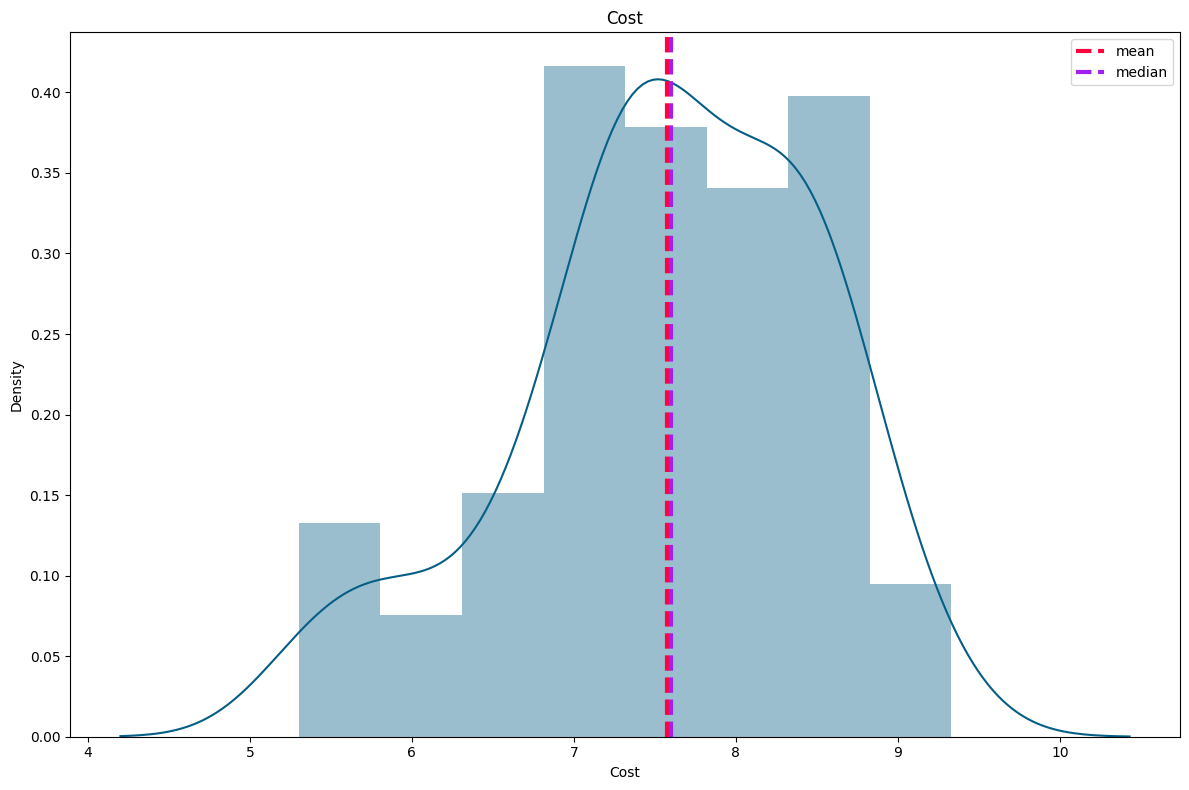

In [ ]:
# visualization of log transformation of cost
sns.distplot(cluster_df['Cost'], color = '#055E85')
plt.axvline(cluster_df['Cost'].mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
plt.axvline(cluster_df['Cost'].median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
plt.title('Cost');
plt.tight_layout();

In [ ]:
# Checking for skewness of cost again
features = ['Cost']
s,sk=skewed_feature(cluster_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Cost']
Skew symmetric features : []


So now there is no skewness in cost. Hence we can proceed further.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Min max scaler for only numeric columns

In [ ]:
scaled_df = cluster_df.copy()
scaled_df[["Cost","No_of_cuisine"]] = scaler.fit_transform(cluster_df[["Cost","No_of_cuisine"]])
scaled_df.set_index("Restaurant_name", inplace= True)

In [ ]:
# Applying minmax transformation to numeric data
numeric_cols = list(cluster_df.describe().columns)
scaled_df = pd.DataFrame(scaler.fit_transform(cluster_df[numeric_cols]))
scaled_df.columns = numeric_cols

In [ ]:
scaled_df

Cost  No_of_cuisine  Cuisines_American  Cuisines_Andhra  \
0    0.831098       0.228571                0.0              0.0   
1    0.200790       0.000000                0.0              0.0   
2    0.695339       0.228571                0.0              0.0   
3    0.772378       0.228571                0.0              0.0   
4    0.600219       0.228571                1.0              0.0   
..        ...            ...                ...              ...   
100  0.055193       0.000000                0.0              0.0   
101  0.616247       0.085714                0.0              0.0   
102  0.709954       0.085714                0.0              0.0   
103  0.422536       0.085714                0.0              0.0   
104  0.570969       0.428571                0.0              0.0   

     Cuisines_Arabian  Cuisines_Asian  Cuisines_BBQ  Cuisines_Bakery  \
0                 0.0             0.0           0.0              0.0   
1                 0.0             0.0           0.0              0.0   
2                 0.0             0.0           0.0              0.0   
3                 0.0             0.0           0.0              0.0   
4                 0.0             0.0           0.0              0.0   
..                ...             ...           ...              ...   
100               0.0             0.0           0.0              0.0   
101               0.0             0.0           0.0              0.0   
102               0.0             1.0           0.0              0.0   
103               0.0             0.0           0.0              0.0   
104               0.0             0.0           0.0              0.0   

     Cuisines_Beverages  Cuisines_Biryani  ...  Cuisines_North Indian  \
0                   0.0               0.0  ...                    1.0   
1                   0.0               0.0  ...                    1.0   
2                   0.0               0.0  ...                    1.0   
3                   0.0               0.0  ...                    1.0   
4                   0.0               0.0  ...                    0.0   
..                  ...               ...  ...                    ...   
100                 0.0               0.0  ...                    0.0   
101                 0.0               0.0  ...                    1.0   
102                 0.0               0.0  ...                    0.0   
103                 0.0               0.0  ...                    0.0   
104                 0.0               0.0  ...                    1.0   

     Cuisines_Pizza  Cuisines_Salad  Cuisines_Seafood  Cuisines_South Indian  \
0               0.0             0.0               0.0                    0.0   
1               0.0             0.0               0.0                    0.0   
2               0.0             0.0               0.0                    0.0   
3               0.0             0.0               0.0                    0.0   
4               0.0             0.0               0.0                    0.0   
..              ...             ...               ...                    ...   
100             0.0             0.0               0.0                    0.0   
101             0.0             0.0               0.0                    0.0   
102             0.0             0.0               0.0                    0.0   
103             0.0             0.0               0.0                    0.0   
104             0.0             0.0               0.0                    1.0   

     Cuisines_Spanish  Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  \
0                 0.0                   0.0             0.0            0.0   
1                 0.0                   0.0             0.0            0.0   
2                 0.0                   0.0             0.0            0.0   
3                 0.0                   0.0             0.0            0.0   
4                 0.0                   0.0             0.0            0.0   
..                ...

##### Which method have you used to scale you data and why?

Since the dummy variables created from cuisines contain the value 0 and 1 while other variables have different range of values, we used MinMax Scaler to scale the data. This feature scaling prevents the models from getting biased toward a specific range of values.

### 7. Dimesionality Reduction (For clustering)

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca

features = scaled_df.columns

# create an instance of PCA
from sklearn.decomposition import PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df)

PCA()

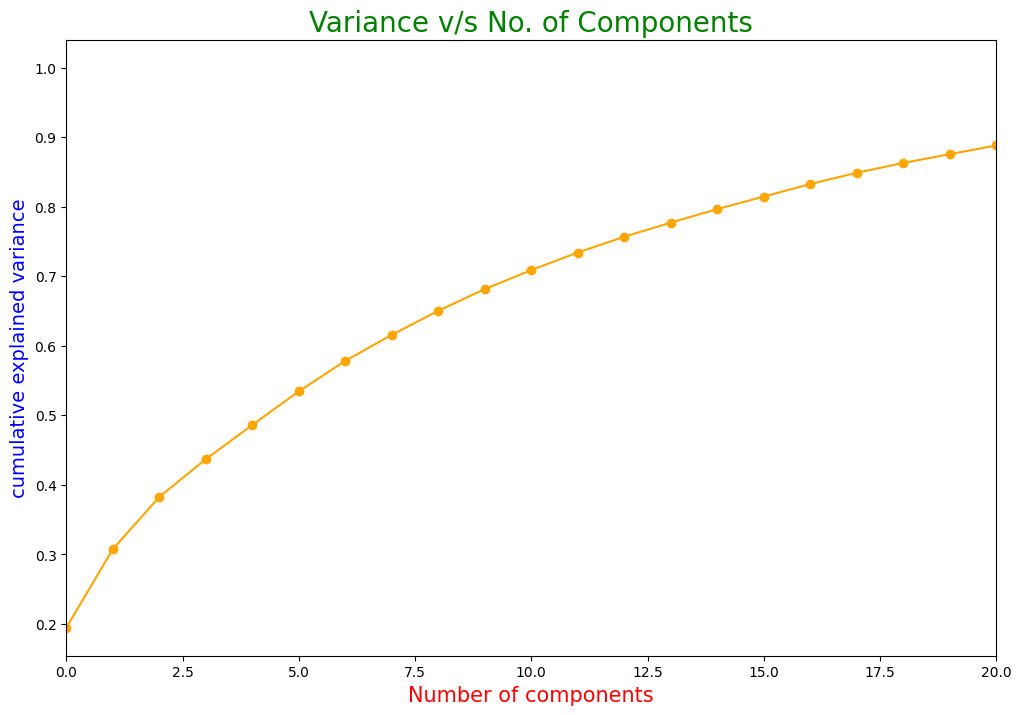

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('Number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 20])
plt.show()

In [ ]:
#using n_component as 4
pca = PCA(n_components=4)

# fit PCA on features
pca.fit(scaled_df)

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 4 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df)

Explained variation per principal component: [0.19454174 0.11290422 0.07516374 0.05430964]
Cumulative variance explained by 4 principal components: 43.69%


In [ ]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (105, 46)
transformed shape: (105, 4)


##### Do you think that dimensionality reduction is needed? Explain Why?

1.**Computational Cost**: As the number of features (variables) in a dataset increases, the computational cost of cluster algorithms typically rises. Clustering algorithms need to examine all pairs of data points, and with more features, the number of calculations grows exponentially, which can lead to longer processing times.

2.**Curse of Dimensionality**: The "curse of dimensionality" is a phenomenon where data points become more sparse as the number of dimensions (features) increases. This sparsity can make it challenging for clustering algorithms to identify meaningful clusters because data points become equidistant from each other in high-dimensional space, reducing the distinction between clusters.

To address these challenges when working with high-dimensional data:

1.**Feature Selection/Extraction**: Consider reducing the dimensionality of your dataset by selecting a subset of the most relevant features or performing feature extraction techniques like Principal Component Analysis (PCA) to create a smaller set of meaningful features.

2.**Preprocessing**: Apply techniques like feature scaling or normalization to ensure that features have a similar scale, which can help clustering algorithms perform better.

3.**Algorithm Selection**: Choose clustering algorithms that are robust to high-dimensional data, such as density-based methods like DBSCAN or hierarchical clustering. These methods are less affected by the curse of dimensionality compared to, say, k-means.

4.**Dimensionality Reduction**: Explore dimensionality reduction techniques like t-SNE (t-distributed stochastic neighbor embedding) or UMAP (Uniform Manifold Approximation and Projection) to project your high-dimensional data into lower-dimensional spaces while preserving important relationships.

5.**Evaluation**: Use appropriate evaluation metrics for clustering in high-dimensional spaces, as traditional metrics may not be as informative. Silhouette score or Davies-Bouldin index are examples of metrics suitable for high-dimensional clustering.

By addressing these considerations and leveraging techniques tailored to high-dimensional data, you can enhance the effectiveness and efficiency of clustering analyses while mitigating the challenges associated with high dimensionality.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Because PCA( Principal Component Analysis) is a widely used dimensionality reduction technique that can find the patterns in the data that cause the most variation, we have used it as such. While maintaining trends and patterns, primary component analysis( PCA) reduces the complexity of high-dimensional data. This is accomplished by condensing the data into smaller dimensions that serve as feature summaries.

### 8. Data Splitting (for sentimental analysis)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
#X = X_tfidf
y = sentiment_df['Sentiment']

In [ ]:
y.value_counts()

1    6321
0    3678
Name: Sentiment, dtype: int64

In [ ]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# describes info about train and test set
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (7499, 17305)
y_train  (7499,)
X_test  (2500, 17305)
y_test  (2500,)


In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

##### What data splitting ratio have you used and why?

we have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

<Axes: ylabel='Sentiment'>

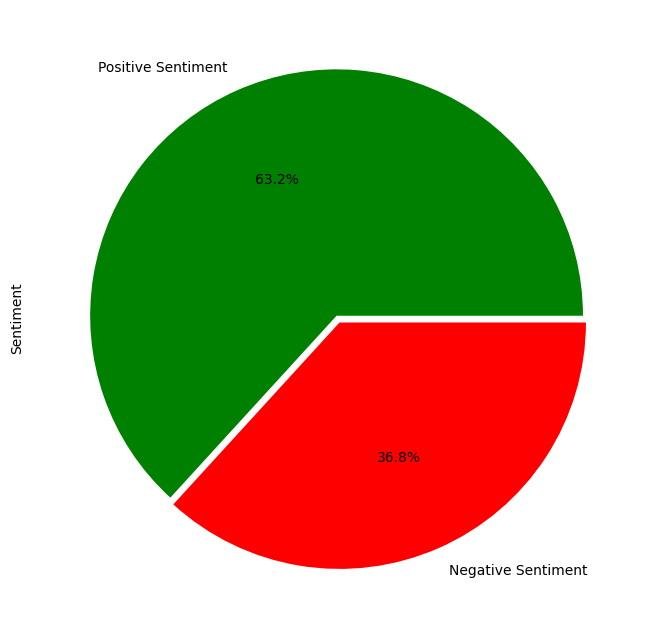

In [ ]:
# check if dataset is imbalanced or not
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                               autopct="%1.1f%%",
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['green','red'],
                               explode=[0.01,0.02])

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced but since it is lightly imbalanced, hence handling is not neccesaary. So we can proceed with same dataset.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#not needed

## ***7. ML Model Implementation***

### ML Model - 1 : CLUSTERING


```
K Means clustering
```

In [ ]:
df_pca_copy = df_pca.copy()

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans
# Fit the Algorithm
wcss_list= []  #Initializing the list for the values of WCSS
wcss_dict = {}
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(df_pca)
    wcss_list.append(kmeans.inertia_)
    wcss_dict[i] = kmeans.inertia_

In [ ]:
wcss_dict

{1: 109.63930004994627,
 2: 71.4368704678012,
 3: 52.75084151988398,
 4: 39.080465055230704,
 5: 27.778334377189214,
 6: 23.70136851266914,
 7: 20.831783737411826,
 8: 18.400353701242835,
 9: 16.260666234460526,
 10: 14.199301365055256}

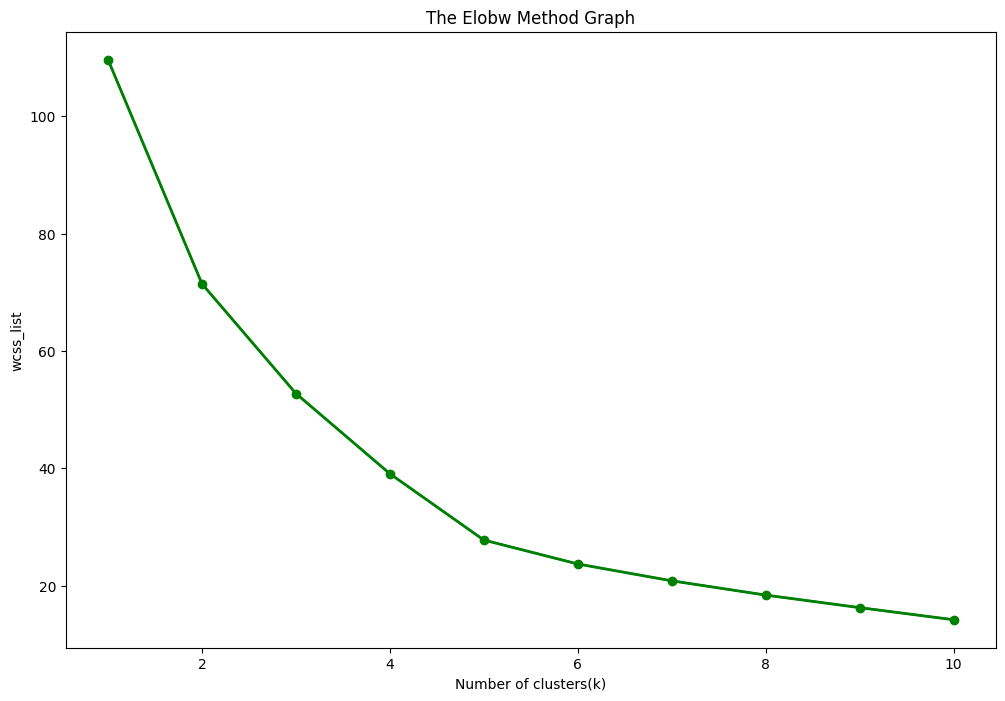

In [ ]:
# plot for sum of squared distance for each number of cluster
plt.plot(range(1, 11), wcss_list)
plt.plot(range(1,11),wcss_list, linewidth=2, color="green", marker ="o")
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

###Fitting the model with hyperparameter tuning

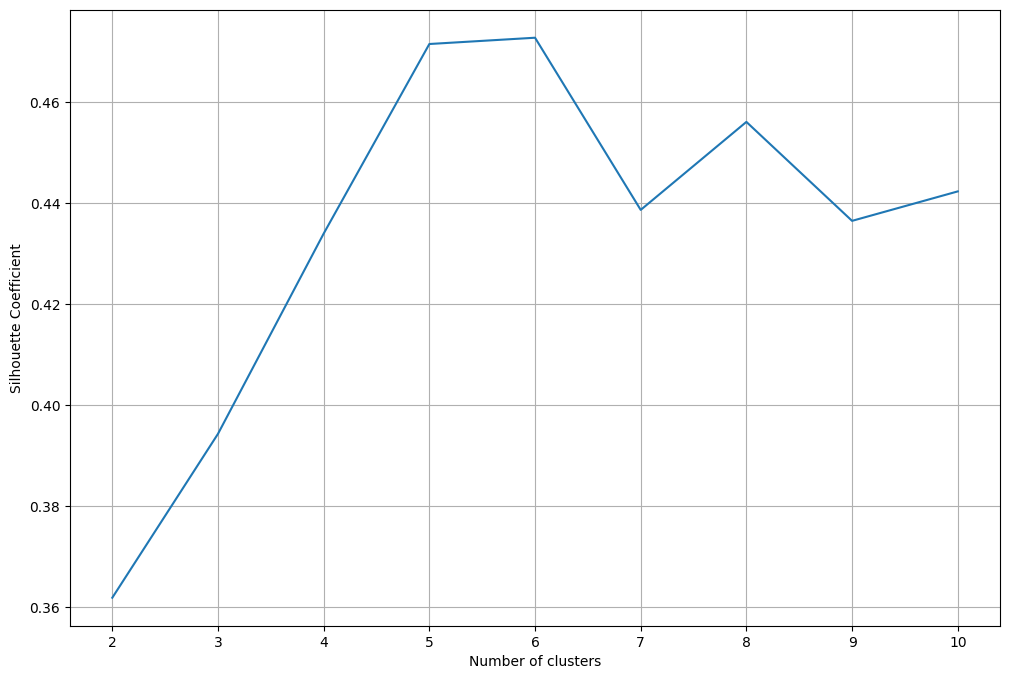

In [ ]:
# silhoutte score to find optimal number of scores
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,11):
  km = KMeans(n_clusters=k, random_state=3)
  km.fit(df_pca)
  silhouette_avg.append(silhouette_score(df_pca, km.labels_))

# plot the results
plt.plot(range(2,11), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Here it is clearly visible that Silhouette cofficient is minimum for k=4. Hence optimal number od clusters must be 4.

For n_clusters = 2 The average silhouette_score is : 0.36186963675646516
For n_clusters = 3 The average silhouette_score is : 0.3876311417473593
For n_clusters = 4 The average silhouette_score is : 0.4205169012374313
For n_clusters = 5 The average silhouette_score is : 0.46773119014145353
For n_clusters = 6 The average silhouette_score is : 0.472757613091614


'  for i, c in enumerate(centers):\n      ax2.scatter(c[0], c[1], marker=\'\' %i, alpha=1,\n                    s=50, edgecolor=\'k\')\n\n    ax2.set_title("The visualization of the clustered data.")\n    ax2.set_xlabel("Feature space for the 1st feature")\n    ax2.set_ylabel("Feature space for the 2nd feature")\n    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "\n                  "with n_clusters = %d" % n_clusters),\n                 fontsize=14, fontweight=\'bold\')\n'

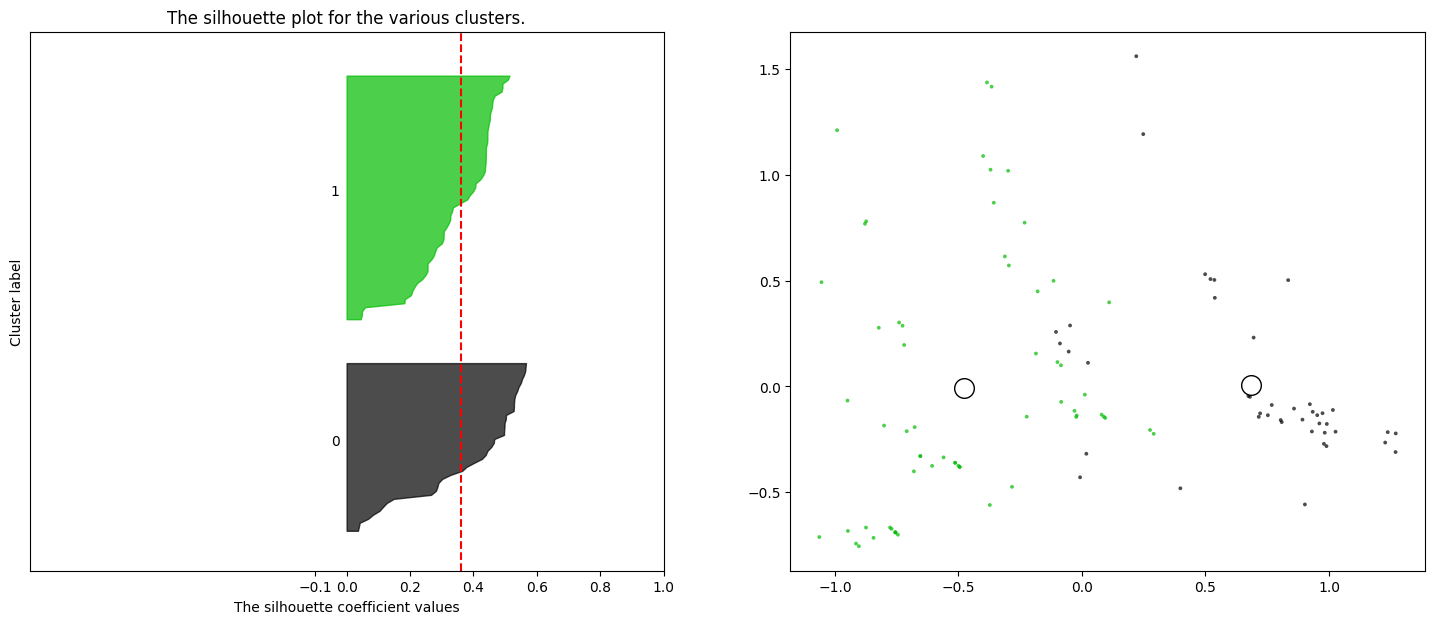

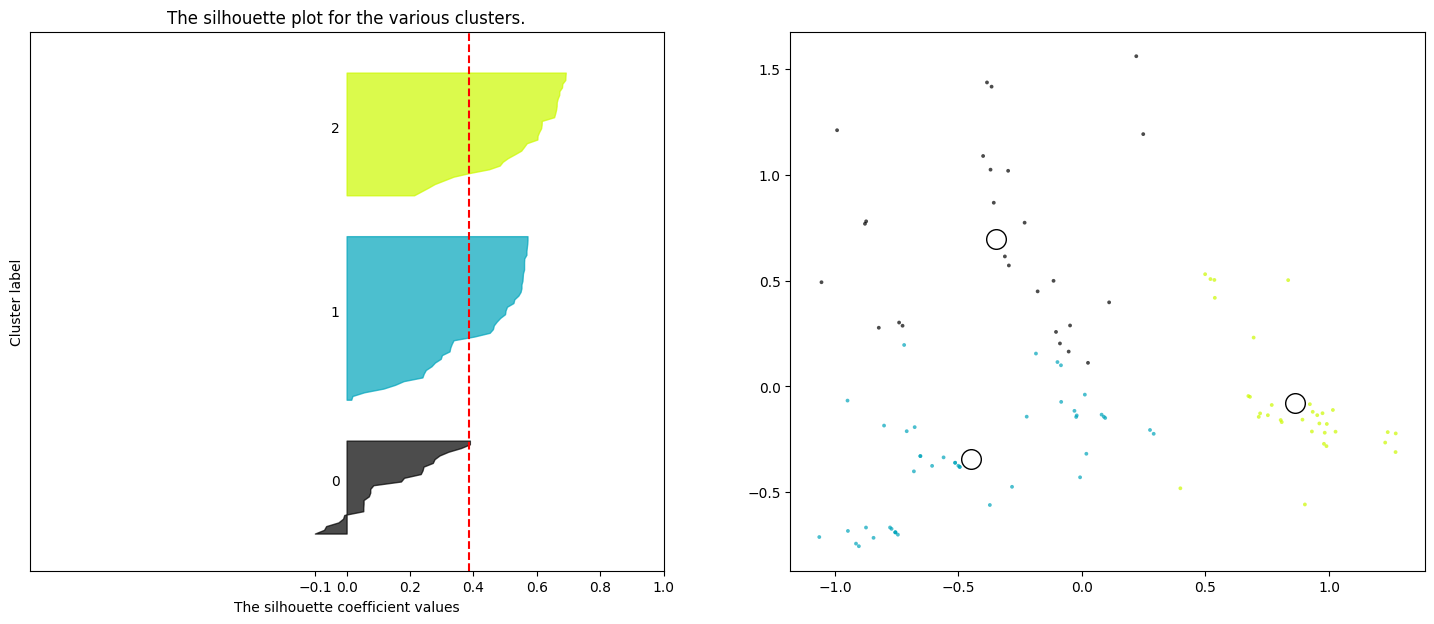

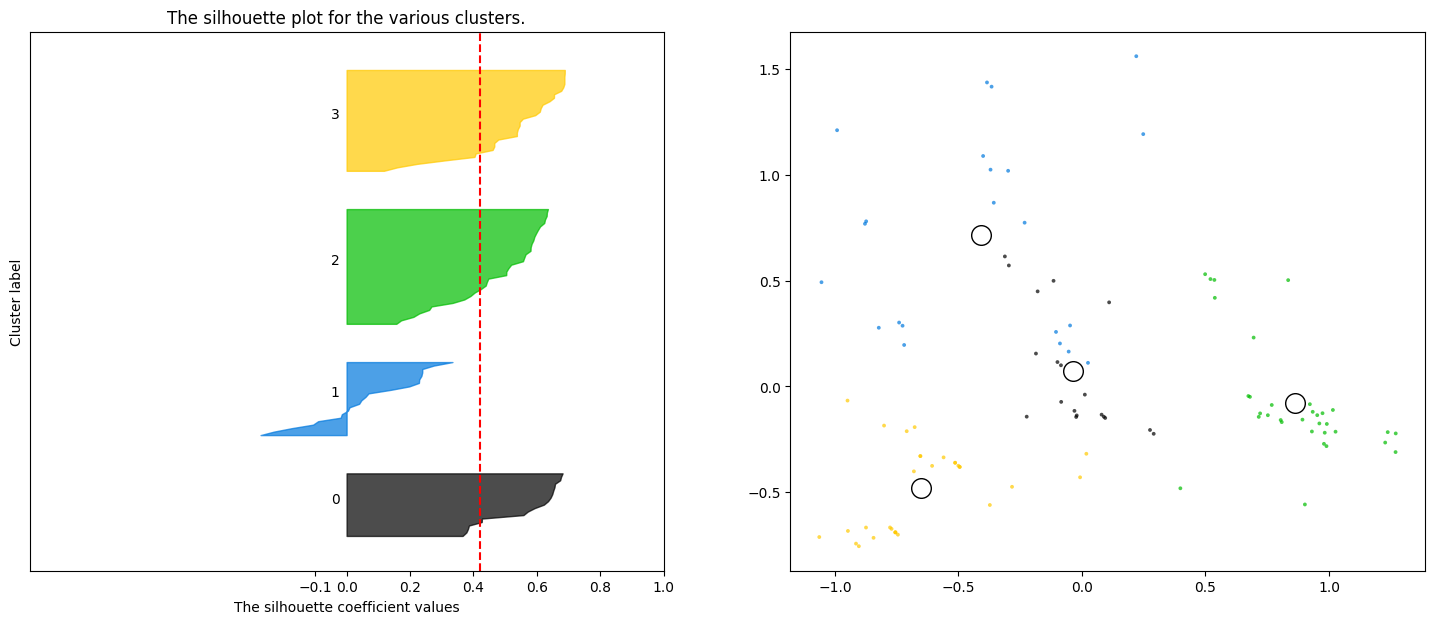

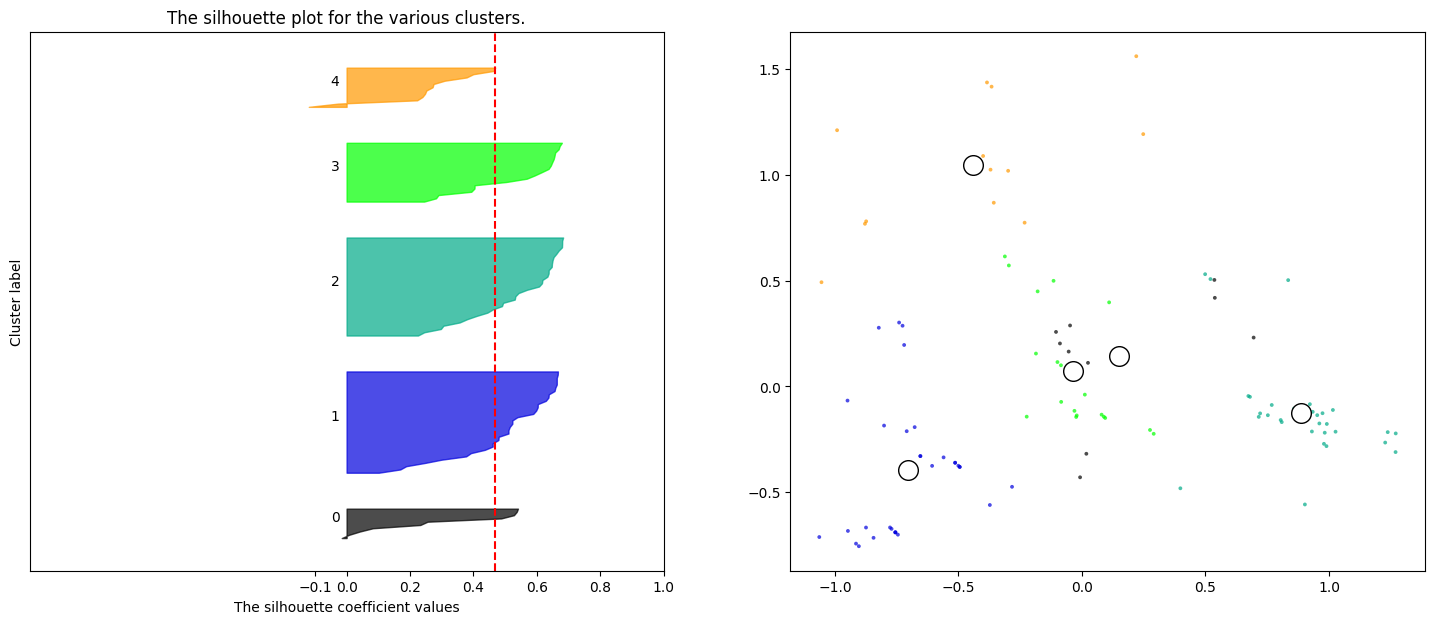

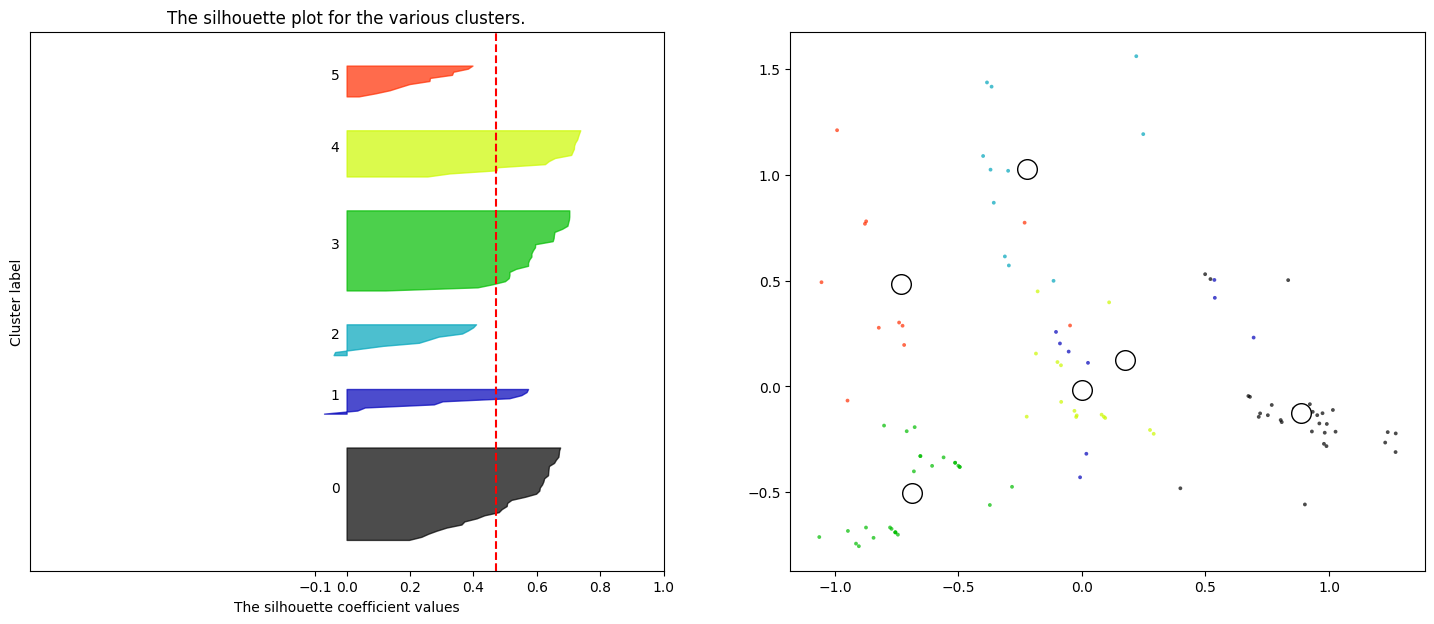

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
#visualizing Silhouette Score for individual clusters and the clusters made
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower =  y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

'''  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='' %i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
'''

In [ ]:
#fitting on 4 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 10)
y_predict= kmeans.fit_predict(df_pca)

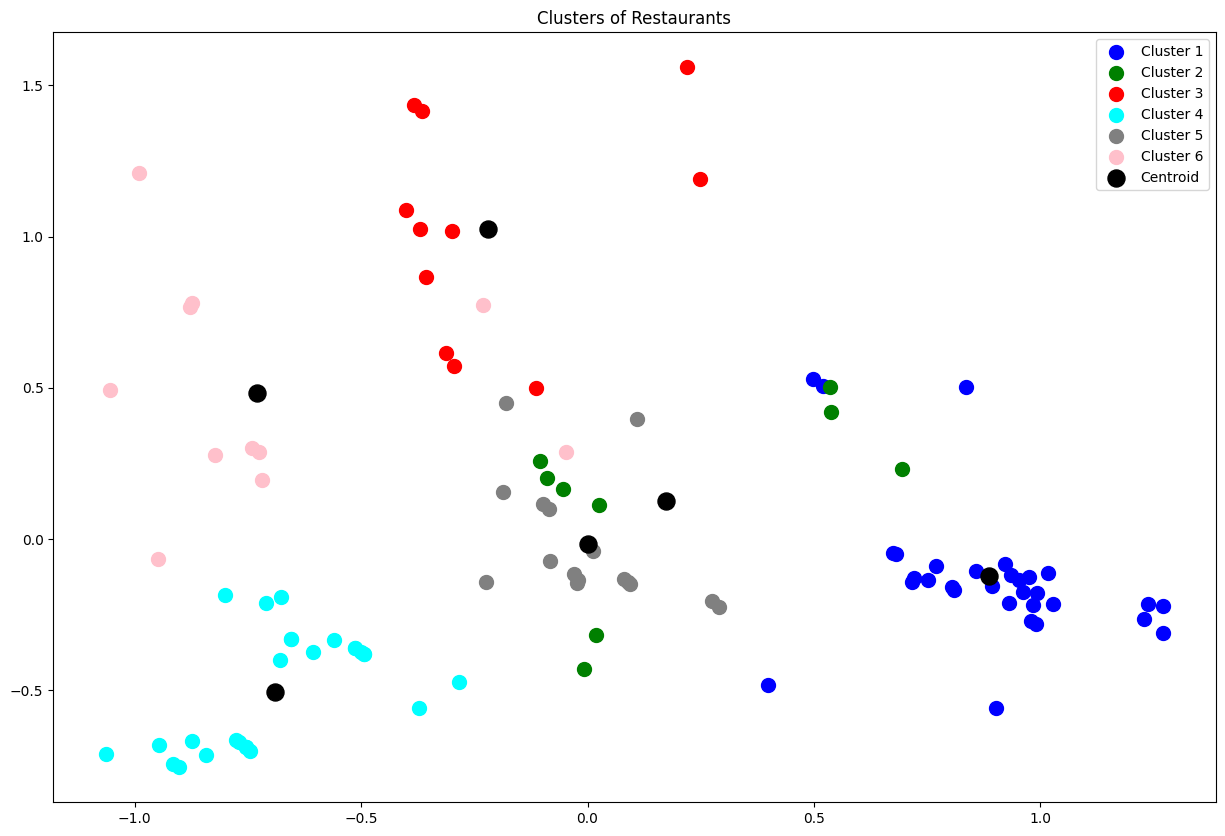

In [ ]:
#visulaizing the clusters
plt.figure(figsize=(15,10))
plt.scatter(df_pca[y_predict == 0, 0], df_pca[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(df_pca[y_predict == 1, 0], df_pca[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(df_pca[y_predict== 2, 0], df_pca[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(df_pca[y_predict == 3, 0], df_pca[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(df_pca[y_predict == 4, 0], df_pca[y_predict == 4, 1], s = 100, c = 'grey', label = 'Cluster 5') #for first cluster
plt.scatter(df_pca[y_predict == 5, 0], df_pca[y_predict == 5, 1], s = 100, c = 'pink', label = 'Cluster 6') #for second cluster
'''plt.scatter(df_pca[y_predict== 6, 0], df_pca[y_predict == 6, 1], s = 100, c = 'magenta', label = 'Cluster 7') #for third cluster
plt.scatter(df_pca[y_predict == 7, 0], df_pca[y_predict == 7, 1], s = 100, c = 'orange', label = 'Cluster 8') #for fourth cluster

'''
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroid')
plt.title('Clusters of Restaurants')
plt.legend()
plt.show()

In [ ]:
# Assigning clusters to our data
new_df_cluster = cluster_df.copy()
cluster_df['clusters'] = y_predict
# checking how it is working
cluster_df.head()

Restaurant_name      Cost  No_of_cuisine  Cuisines_American  \
0               10 Downing Street  8.648397              9                  0   
1                        13 Dhaba  6.111467              1                  0   
2  3B's - Buddies, Bar & Barbecue  8.101981              9                  0   
3       AB's - Absolute Barbecues  8.412055              9                  0   
4               Absolute Sizzlers  7.719130              9                  1   

   Cuisines_Andhra  Cuisines_Arabian  Cuisines_Asian  Cuisines_BBQ  \
0                0                 0               0             0   
1                0                 0               0             0   
2                0                 0               0             0   
3                0                 0               0             0   
4                0                 0               0             0   

   Cuisines_Bakery  Cuisines_Beverages  ...  Cuisines_Pizza  Cuisines_Salad  \
0                0                   0  ...               0               0   
1                0                   0  ...               0               0   
2                0                   0  ...               0               0   
3                0                   0  ...               0               0   
4                0                   0  ...               0               0   

   Cuisines_Seafood  Cuisines_South Indian  Cuisines_Spanish  \
0                 0                      0                 0   
1                 0                      0                 0   
2                 0                      0                 0   
3                 0                      0                 0   
4                 0                      0                 0   

   Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  Cuisines_Wraps  \
0                     0               0              0               0   
1                     0               0              0               0   
2                     0               0              0               0   
3                     0               0              0               0   
4                     0               0              0               0   

   clusters  
0         5  
1         4  
2         4  
3         4  
4         5  

[5 rows x 48 columns]

In [ ]:
# let's find the count of each of 4 clusters
cluster_df['clusters'].value_counts()

0    31
3    27
4    16
5    11
2    11
1     9
Name: clusters, dtype: int64

In [ ]:
#creating new df for checkign cuisine in each cluster
new_cluster_df = hotel_df.copy()
new_cluster_df['clusters'] = y_predict
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant_name  Cost      Cuisines  \
75          Royal Spicy Restaurant   700  South Indian   
5            The Fisherman's Wharf  1500   Continental   
3   Shah Ghouse Hotel & Restaurant   800       Biryani   
81                        Delhi-39   600       Chinese   
70      Urban Asia - Kitchen & Bar  1100         Momos   

                                              Timings  No_of_cuisine  clusters  
75                                  10:30 AM to 11 PM              2         4  
5   12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P...              5         3  
3                                     12 Noon to 2 AM              5         4  
81                             11am to 11pm (Mon-Sun)              2         3  
70                     12 Noon to 3 PM, 7 PM to 11 PM              5         3

In [ ]:
new_cluster_df.shape

(313, 6)

In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['clusters'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["clusters"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 5 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Ice Cream' 'Desserts' 'Fast Food' 'Momos'
 'Japanese' 'Sushi' 'Mughlai' 'Biryani' 'Bakery' 'Seafood' 'Hyderabadi'] 

Cuisine List for Cluster : 4 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Seafood' 'Beverages' 'European' 'American' 'Fast Food' 'South Indian'
 'Andhra' 'Continental' 'Italian' 'Mughlai' 'Salad' 'Momos' 'Hyderabadi'
 'Bakery' 'Mithai'] 

Cuisine List for Cluster : 3 

['Seafood' 'Goan' 'North Indian' 'Continental' 'Asian' 'American'
 'Chinese' 'Kebab' 'South Indian' 'Street Food' 'Fast Food' 'Italian'
 'Finger Food' 'Mediterranean' 'European' 'Spanish' 'Bakery' 'Desserts'
 'Cafe' 'Andhra' 'Modern Indian' 'Beverages' 'Hyderabadi' 'BBQ' 'Thai'
 'Sushi' 'Momos' 'Mughlai' 'Biryani'] 

Cuisine List for Cluster : 0 

['Healthy Food' 'North Indian' 'Continental' 'South Indian' 'Lebanese'
 'Ice Cream' 'Desserts' 'Americ

In [ ]:
import plotly.express as px

In [ ]:
# clusters with cost
fig = px.scatter(cluster_df, y="Cost", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

In [ ]:
# clusters with no of cuisines
fig = px.scatter(cluster_df, y="No_of_cuisine", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means Clustering is a type of Unsupervised Learning algorithm. It falls into the category of centroid-based algorithms, where each cluster is connected to a centroid. The primary objective of this algorithm is to minimize the total distance between data points and their respective clusters. It takes an unlabeled dataset as input, divides the dataset into a predetermined number of clusters (k), and repeats the process until the optimal clusters are found. Two methods can be employed to determine the value of k: 1) ELBOW METHOD This method utilizes the concept of WCSS (Within Cluster Sum of Squares), which quantifies the total variations within a cluster. 2) SILHOUETTE METHOD The silhouette coefficient, or silhouette score, is a measure of how similar a data point is within its cluster (cohesion) compared to other clusters (separation).

#### 2. Explain the business impact of the ML model used.

K-means clustering is a valuable tool for segmenting customers based on various types of data, including demographic, psychographic, behavioral, and performance data. By clustering consumers within a specific product category, businesses can effectively develop strategies tailored to different customer segments and improve customer retention for long-term business growth.

### ML Model - 2 : DBSCAN

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)

#fitting on model
model = dbscan.fit(df_pca)

#find out the labels
labels = model.labels_


In [ ]:
#calculating no of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

5

In [ ]:
#find the silhoutte score
from sklearn import metrics
print(metrics.silhouette_score(df_pca,labels))

0.38991155348316553


In [ ]:
# predict thr clusters or labels and append in cluster df
yhat = model.fit_predict(df_pca)
cluster_df["Label_DBscan"] = yhat
cluster_df['Label_DBscan'].unique()

array([ 0,  1, -1,  2,  3,  4])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN is an acronym for Density-Based Spatial Clustering of Applications with Noise. It forms a single cluster by grouping data points that are closely packed together. By examining the local density of the data points, DBSCAN can detect clusters in extensive spatial datasets. The standout characteristic of DBSCAN clustering is its ability to handle outliers effectively. Unlike K-Means, which necessitates specifying the number of centroids in advance, DBSCAN does not require this information.

### ML Model - 4 : Sentimental Analysis

Since we get a lot of reviews from the customers, it would be necesary to determine the sentiments of these reviews. We would be consider to build a supervised machine learning model to achieve the objective of determining the sentiments.

In [ ]:
#Importing all the required libraries for sentiment analysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
# List of models
models = [["LogisticRegression", LogisticRegression(fit_intercept = True, class_weight='balanced')], ["DecisionTree", DecisionTreeClassifier()],
          ["RandomForest",RandomForestClassifier()],["XGBoost", XGBClassifier()],
          ["KNN", KNeighborsClassifier()]]

In [ ]:
#function for fitting the model and calculating scores

def model_build(models,X_train,X_test,y_train,y_test):
  """
  This function builds the classification models using the traing and testing datas passed as arguments
  and returns the respective model metrics, confusion matrices and the roc curve values.
  Paramaters:
  X_train, X_test, y_train and y_test as pandas dataframe or numpy ndarray
  models: A list with model name and the model class.
  """
  score_matrix = pd.DataFrame()
  # dictionary for roc curve
  roc_sc = {}

  for model_name,model in models:
    current_result = dict()

    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    ypredProb = model.predict_proba(X_test)

    # Model metrics
    current_result["Model"] = model_name

    #Accuracy
    current_result["Train Accuracy"] = accuracy_score(y_train,y_pred_train)
    current_result["Test Accuracy"] = accuracy_score(y_test,y_pred_test)

    #Precision
    current_result["Test Precision"] = precision_score(y_test,y_pred_test)

    # Recall
    current_result["Test Recall"] = recall_score(y_test, y_pred_test)

    #f1 score
    current_result["Test F1"] = f1_score(y_test, y_pred_test)

    #AUC_ROC curve
    current_result["Test ROC_AUC Score"] = roc_auc_score(y_test,y_pred_test)
    current_result = pd.DataFrame(current_result,index=[1])

    #appending in score_matrix
    score_matrix = score_matrix.append(current_result)

    # ROC roc_curve values
    fpr, tpr, threshold = roc_curve(y_test, ypredProb[:,1])

    roc_sc[model_name] = (fpr,tpr)

  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  roc_sc["TPR = FPR"] = (p_fpr, p_tpr)
  return score_matrix , roc_sc

In [ ]:
# Obtaining results
model_results, Curve = model_build(models,X_train,X_test,y_train,y_test)

In [ ]:
model_results

Model  Train Accuracy  Test Accuracy  Test Precision  \
1  LogisticRegression        0.913855         0.8736        0.914361   
1        DecisionTree        0.991999         0.7872        0.826441   
1        RandomForest        0.991999         0.8684        0.855106   
1             XGBoost        0.939725         0.8704        0.884379   
1                 KNN        0.663022         0.6468        0.642474   

   Test Recall   Test F1  Test ROC_AUC Score  
1     0.881830  0.897801            0.870720  
1     0.837992  0.832177            0.769428  
1     0.952351  0.901112            0.839026  
1     0.913596  0.898750            0.855286  
1     0.989835  0.779195            0.526775

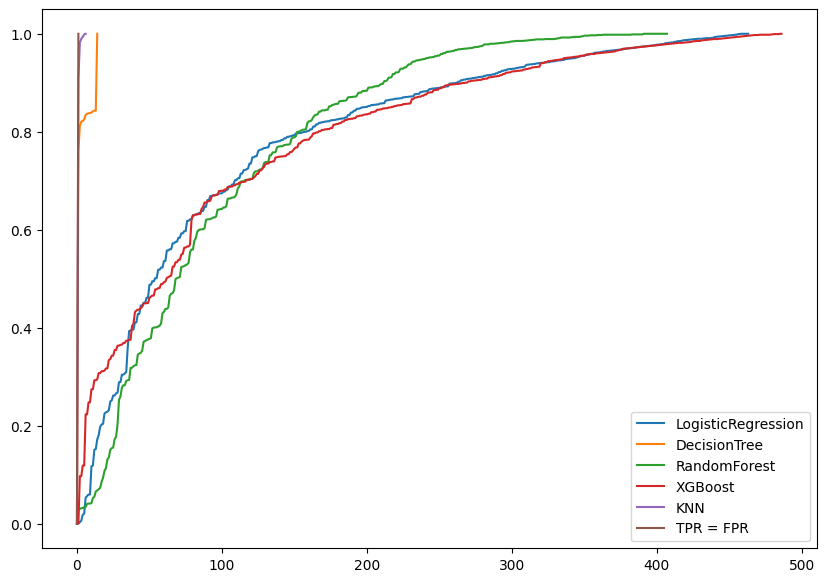

In [ ]:
# ROC_AUC curve
plt.figure(figsize = (10,7))
for model , value in Curve.items():
  sns.lineplot(value[1], label = model)

Based on the metrics and ROC-AUC curve presented above, we can conclude that logistic regression is the most suitable model for this dataset. Following closely behind are the XGBoost model and Random Forest. Conversely, KNN performs the poorest among all models for this dataset. To further refine the logistic regression model, we will conduct hyperparameter tuning to obtain the final model for this dataset.

2. Hyperparameter tuning

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

A) Logistic Regression

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    }
]

In [ ]:
grid_lr = GridSearchCV( LogisticRegression(fit_intercept = True, class_weight='balanced'), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = grid_lr.fit(X_train,y_train)

# Get the results
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)
print(grid_lr.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.8530466053087902
LogisticRegression(class_weight='balanced')
{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
final_model = LogisticRegression(random_state=42, solver='lbfgs', penalty= 'l2', C = 10 )
final_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [ ]:
# prediction report
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8637    0.7937    0.8272       926
           1     0.8842    0.9263    0.9047      1574

    accuracy                         0.8772      2500
   macro avg     0.8739    0.8600    0.8660      2500
weighted avg     0.8766    0.8772    0.8760      2500



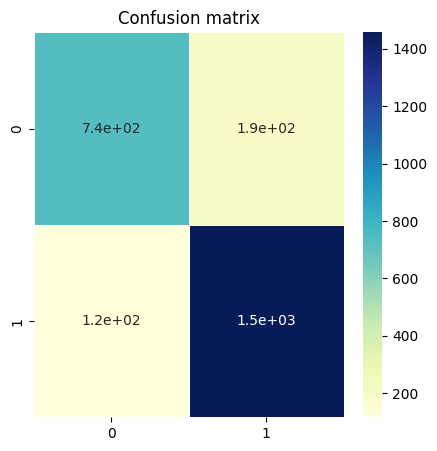

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

We have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of C.I got best params 'C': 10. I have also used Cross validation with CV = 3.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of Logistic Regression we observed the following improvements in the evaluation metrics.

Accuracy Before: 85.09% || Accuracy After: 86.00%

Precision Before: 90.54% || Precision After:85.89 %

Recall Before: 85.28% || Recall After: 86.00%

F1 Score Before: 87.84%|| F1 Score After: 85.89%

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics utilized for sentiment analysis encompass precision, recall, F1-score, and accuracy. Precision assesses the ratio of accurate positive predictions to all positive predictions. This metric proves advantageous when the consequences of false positives are significant. Recall (also known as sensitivity or true positive rate) gauges the ratio of accurate positive predictions to all actual positive instances. It is a valuable metric when the repercussions of false negatives are substantial. F1-score is the harmonic mean of precision and recall and serves as a comprehensive measure of a classifier's effectiveness. Accuracy denotes the ratio of correctly classified instances to all instances. The choice of evaluation metric hinges on the specific use case and the respective costs associated with false positives and false negatives. To achieve positive business impact, the F1-score can be considered as it strikes a balance between precision and recall, providing an overall performance measurement.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The logistic regression model was selected for the final prediction due to its highest auc_roc score compared to other models.

## ***8. Conclusion***


Analyzing a dataset of customer reviews for Zomato's food delivery service is a valuable endeavor with the primary goals of understanding the customer's experience and gaining deeper insights into their feedback. This analysis can yield several benefits, including:

Customer Insights: By clustering reviews, you can identify common themes, preferences, and pain points among customers. This information can help Zomato tailor its services to better meet customer expectations.

Sentiment Analysis: Sentiment analysis allows you to gauge the overall sentiment (positive, negative, or neutral) of customer feedback. This can help Zomato assess the general satisfaction of its customers and pinpoint areas that need improvement.

Quality Improvement: Detailed analysis of customer feedback can highlight specific aspects of the service that require attention. Zomato can use this information to make targeted improvements and enhance the overall customer experience.

Marketing and Promotion: Positive feedback can be leveraged in marketing and promotional efforts to showcase the strengths of the service. It can also help identify unique selling points that can be emphasized in marketing campaigns.

Competitive Advantage: Understanding customer sentiment and preferences can provide a competitive advantage by allowing Zomato to differentiate itself from competitors and offer services that align with customer demands.

In summary, the analysis of customer reviews for Zomato's food delivery service serves as a valuable tool for improving customer satisfaction, refining services, and staying competitive in the market. It allows Zomato to listen to its customers, address their needs, and continuously enhance the quality of its offerings.








#*CONCLUSION FROM CLUSTERING:*

 K-Means clustering and DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to cluster restaurants based on features like cuisines, prices, and ratings. K-Means is a centroid-based clustering algorithm, while DBSCAN is a density-based clustering algorithm. These techniques can help group similar restaurants together based on the characteristics you've chosen
#*SENTIMENT ANALYSIS CONCLUSION*

 I employed a range of supervised machine learning models to analyze and classify sentiment in text data. These models include logistic regression, decision trees, random forests, XGBoost, and K-Nearest Neighbors (KNN).

Here's a summary of your results:

Logistic Regression was selected as the final model.
The accuracy of the logistic regression model was 86%.
After hyperparameter tuning, the F1 score of the model improved to 85%.
This is a great achievement! Achieving an accuracy of 86% and an F1 score of 85% indicates that your model is performing well in classifying sentiment in text data. Logistic regression is a commonly used model for binary classification tasks like sentiment analysis.


#*EDA'S CONCLUSION*

**Restaurant Prices**:

Restaurants in the area offer a wide range of prices, from less than 500 rupees to over 2500 rupees per person.
There are only a few restaurants with very high prices (above 2000 rupees).


**Expensive Restaurants**:

The most expensive restaurant is "Collage-Hyatt Hyderabad Gachibowli," where dining can cost 2800 rupees per person.
"Feast-Sheraton Hyderabad Hotel" is also pricey at 2500 rupees.


**Affordable Options**:

If you're looking for budget-friendly options, "Mohammedia Shawarma" and "Amul" offer dishes for as low as 150 rupees.
Other affordable choices include "Sweet Basket" and "KS Bakers," with prices starting at 200 rupees.


**Popular Cuisines**:

The most popular types of cuisine in these restaurants are North Indian, Chinese, and Continental.

